In [1]:
%matplotlib inline
import numpy as np
import matplotlib.tri as Tri
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset as NetCDFFile 
import netCDF4
from netCDF4 import num2date, date2num, date2index
import datetime as dt
import pandas as pd
from StringIO import StringIO
import xarray as xr
from scipy import stats

/Users/bgh2-ra/anaconda2/lib/python2.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/Users/bgh2-ra/anaconda2/lib/python2.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


## Install File

In [2]:
nameCSV = 'innis_day.csv'
df = pd.read_csv(str(nameCSV), sep=r'\s+', engine='c', header=0, na_filter=False, \
                               dtype=np.float, low_memory=False)

data = df.sort_values(by=['tt'])

lat = data.values[:,0]
lon = data.values[:,1]
wh = data.values[:,2]
tt = data.values[:,3]
qc = data.values[:,4]
back =data.values[:,5]
ws = data.values[:,6]

In [184]:
len(lat)

44616

In [136]:
for k in range(len(tt)):
    print wh[k], netCDF4.num2date(tt[k],u'days since 1985-01-01 00:00:00 UTC')

0.32700002 1985-04-05 21:26:14.031253
0.27899999999999997 1985-04-05 21:26:15.015627
0.30800003 1985-04-05 21:26:16.000001
0.25 1985-04-05 21:26:16.968755
2.164 1985-04-08 21:35:06.187500
1.4530001000000001 1985-04-23 09:53:27.187502
1.5970001 1985-04-23 09:53:28.164061
1.4530001000000001 1985-04-23 09:53:29.148435
1.7030001000000001 1985-04-23 09:53:30.125004
1.6930001000000001 1985-04-23 09:53:31.109378
2.4050002 1985-05-16 11:33:12.335938
2.318 1985-05-16 11:33:13.320312
2.3660002 1985-05-16 11:33:14.296871
2.2800002 1985-05-16 11:33:15.281255
2.184 1985-05-16 11:33:16.257814
0.51000005 1985-07-30 16:49:32.875000
0.51000005 1985-07-30 16:49:33.859374
0.51000005 1985-07-30 16:49:34.828128
0.568 1985-07-30 16:49:36.796876
0.37500003 1985-07-30 16:49:37.781250
0.423 1985-07-30 16:49:38.750004
1.3950001 1985-08-22 18:29:00.375000
1.222 1985-08-22 18:29:02.343748
1.077 1985-08-22 18:29:03.328122
1.3659999999999999 1985-08-22 18:29:04.296876
1.1350001 1985-08-22 18:29:05.281250
1.3850001 

1.097 1993-02-27 05:23:47.648436
1.097 1993-02-27 05:23:48.722660
1.3080001 1993-02-27 05:23:51.945314
0.88600004 1993-02-27 05:23:59.464847
0.88600004 1993-02-27 05:24:01.613276
1.5180001 1993-03-07 14:37:55.359378
1.3080001 1993-03-07 14:37:56.437505
1.3080001 1993-03-07 14:37:57.515622
1.202 1993-03-07 14:37:58.593750
1.3080001 1993-03-07 14:37:59.656246
1.3080001 1993-03-07 14:38:00.734374
1.3080001 1993-03-07 14:38:01.812501
1.4130001 1993-03-07 14:38:02.874998
1.4130001 1993-03-07 14:38:03.953125
1.3080001 1993-03-07 14:38:05.031252
1.3080001 1993-03-07 14:38:06.109380
1.3080001 1993-03-07 14:38:07.171876
1.3080001 1993-03-07 14:38:08.250004
1.4130001 1993-03-07 14:38:09.328121
1.4130001 1993-03-07 14:38:10.406248
1.3080001 1993-03-07 14:38:11.468745
1.4130001 1993-03-07 14:38:12.546872
1.4130001 1993-03-07 14:38:13.625000
1.5180001 1993-03-07 14:38:14.687497
1.202 1993-03-09 03:22:12.830077
1.202 1993-03-09 03:22:13.904302
1.202 1993-03-09 03:22:14.978516
1.202 1993-03-09 03:22:

1.3080001 1993-10-23 04:48:16.132809
1.4130001 1993-10-23 04:48:17.207034
1.4130001 1993-10-23 04:48:18.281249
1.3080001 1993-10-23 04:48:19.355473
1.202 1993-10-23 04:48:20.429688
1.3080001 1993-10-23 04:48:21.503903
1.3080001 1993-10-23 04:48:22.574215
1.3080001 1993-10-23 04:48:23.648439
1.202 1993-10-23 04:48:24.722654
1.097 1993-10-23 04:48:25.796879
1.202 1993-10-23 04:48:26.871093
1.3080001 1993-10-23 04:48:27.945308
1.202 1993-10-23 04:48:29.019533
1.097 1993-10-23 04:48:30.093747
1.097 1993-10-23 04:48:31.164060
1.202 1993-10-23 04:48:32.238284
1.202 1993-10-23 04:48:33.312499
1.202 1993-10-23 04:48:34.386724
1.3080001 1993-10-23 04:48:35.460938
0.88600004 1993-10-31 14:02:48.968751
1.3080001 1993-11-02 02:46:48.548831
1.202 1993-11-02 02:46:49.550777
1.202 1993-11-02 02:46:50.550782
1.202 1993-11-02 02:47:03.564451
0.675 1993-11-10 12:01:01.062503
0.675 1993-11-10 12:01:02.132815
0.78000003 1993-11-10 12:01:03.210933
0.78000003 1993-11-10 12:01:04.281255
0.78000003 1993-11-10

2.2570002000000002 1994-05-07 23:34:30.281250
2.2570002000000002 1994-05-07 23:34:31.359378
2.3620002 1994-05-07 23:34:32.421874
2.3620002 1994-05-07 23:34:33.500002
2.3620002 1994-05-07 23:34:34.578129
2.3620002 1994-05-07 23:34:35.656246
2.2570002000000002 1994-05-07 23:34:36.718753
2.2570002000000002 1994-05-07 23:34:37.796870
2.151 1994-05-07 23:34:38.874998
2.151 1994-05-07 23:34:39.953125
2.3620002 1994-05-07 23:34:41.015622
2.2570002000000002 1994-05-07 23:34:42.093749
2.3620002 1994-05-07 23:34:43.171877
2.2570002000000002 1994-05-07 23:34:44.234373
1.5180001 1994-05-09 12:18:43.687498
1.5180001 1994-05-09 12:18:44.757810
1.4130001 1994-05-09 12:18:45.835937
1.5180001 1994-05-09 12:18:46.906249
1.4130001 1994-05-09 12:18:47.984377
1.5180001 1994-05-09 12:18:49.054689
1.5180001 1994-05-09 12:18:50.125001
1.3080001 1994-05-09 12:18:51.203128
1.202 1994-05-09 12:18:52.273440
1.4130001 1994-05-09 12:18:53.351567
1.5180001 1994-05-09 12:18:54.421879
1.835 1994-05-09 12:18:55.499997


1.4130001 1994-10-23 13:09:33.148437
1.4130001 1994-10-23 13:09:34.218749
1.4130001 1994-10-23 13:09:35.296876
1.5180001 1994-10-23 13:09:36.367188
1.4130001 1994-10-23 13:09:37.445316
1.202 1994-10-23 13:09:38.515628
1.7290001 1994-10-25 01:53:36.711909
1.94 1994-10-25 01:53:37.786134
1.94 1994-10-25 01:53:38.860349
1.94 1994-10-25 01:53:39.933598
2.046 1994-10-25 01:53:41.007812
1.94 1994-10-25 01:53:42.082027
1.94 1994-10-25 01:53:43.156252
1.94 1994-10-25 01:53:44.230466
1.94 1994-10-25 01:53:45.303716
1.94 1994-10-25 01:53:46.377930
2.046 1994-10-25 01:53:47.452145
1.94 1994-10-25 01:53:48.526369
2.046 1994-10-25 01:53:49.599609
2.046 1994-10-25 01:53:50.673823
2.046 1994-10-25 01:53:51.748048
2.151 1994-10-25 01:53:52.822262
2.046 1994-10-25 01:53:53.897463
2.2570002000000002 1994-10-25 01:53:54.970702
2.2570002000000002 1994-10-25 01:53:56.044927
0.88600004 1994-11-02 11:07:50.562498
0.88600004 1994-11-02 11:07:51.640626
0.78000003 1994-11-02 11:07:52.710938
0.78000003 1994-11-0

1.8100001000000001 1995-05-30 12:50:03.203123
1.4130001 1995-05-31 05:21:09.785160
1.5180001 1995-05-31 05:21:10.859374
1.5180001 1995-05-31 05:21:11.933589
1.4130001 1995-05-31 05:21:13.007814
1.5180001 1995-05-31 05:21:14.082028
1.4130001 1995-05-31 05:21:15.156253
1.5180001 1995-05-31 05:21:16.230468
1.5180001 1995-05-31 05:21:17.304682
1.5180001 1995-05-31 05:21:18.378907
1.4130001 1995-05-31 05:21:19.449219
1.4130001 1995-05-31 05:21:20.527347
1.5180001 1995-05-31 05:21:21.601561
1.6240001 1995-05-31 05:21:22.675786
1.5180001 1995-05-31 05:21:23.746098
1.6240001 1995-05-31 05:21:24.820313
1.6240001 1995-05-31 05:21:25.898440
1.6240001 1995-05-31 05:21:26.972655
1.6240001 1995-05-31 05:21:28.046879
1.7290001 1995-05-31 05:21:29.117191
2.858 1995-06-02 00:30:48.915530
2.5990002 1995-06-02 00:30:49.896001
2.4910002 1995-06-02 00:30:50.876462
2.9120002 1995-06-02 00:30:51.856934
2.555 1995-06-02 00:30:52.837154
2.2740002 1995-06-02 00:30:53.817625
2.523 1995-06-02 00:30:54.798097
2.50

1.9070001 1995-10-20 00:31:07.884276
0.675 1995-10-26 22:59:04.500003
0.99100006 1995-11-04 08:13:17.523439
0.99100006 1995-11-04 08:13:18.593751
1.097 1995-11-04 08:13:19.671878
0.99100006 1995-11-04 08:13:20.742190
0.88600004 1995-11-04 08:13:21.820317
0.88600004 1995-11-04 08:13:22.890629
0.99100006 1995-11-04 08:13:23.968747
0.99100006 1995-11-04 08:13:25.039059
0.88600004 1995-11-04 08:13:26.117186
0.99100006 1995-11-04 08:13:28.265625
0.99100006 1995-11-04 08:13:29.335937
1.097 1995-11-04 08:13:30.406249
1.202 1995-11-04 08:13:31.484377
1.202 1995-11-04 08:13:32.554689
1.097 1995-11-04 08:13:33.632816
1.097 1995-11-04 08:13:34.703128
1.097 1995-11-04 08:13:35.781245
0.99100006 1995-11-04 08:13:36.851568
0.7390000000000001 1995-11-05 00:27:57.371338
0.7070000000000001 1995-11-05 00:27:58.351810
0.8690000000000001 1995-11-05 00:27:59.332030
0.68500006 1995-11-05 00:28:00.312501
0.79300004 1995-11-05 00:28:01.292973
0.44700003 1995-11-05 00:28:02.273193
0.8690000000000001 1995-11-05

0.5770000000000001 1996-04-09 12:49:46.367185
0.674 1996-04-09 12:49:47.343754
0.36100003 1996-04-09 12:49:48.328128
1.0530001 1996-04-09 12:49:49.304687
0.78300005 1996-04-09 12:49:50.289061
0.69600004 1996-04-09 12:49:51.265630
0.48000002 1996-04-09 12:49:52.250004
0.56600004 1996-04-09 12:49:53.226563
0.66400003 1996-04-09 12:49:54.210937
0.92300004 1996-04-09 12:49:55.187496
0.45800003 1996-04-09 12:49:56.171880
0.523 1996-04-09 12:49:57.148439
0.81500006 1996-04-09 12:49:58.132813
0.8690000000000001 1996-04-09 12:49:59.109371
0.94500005 1996-04-09 12:50:00.093746
0.7070000000000001 1996-04-09 12:50:01.070314
0.569 1996-04-10 23:49:42.546872
0.569 1996-04-10 23:49:43.624999
0.569 1996-04-10 23:49:44.703126
0.46400002 1996-04-10 23:49:45.781253
0.569 1996-04-10 23:49:46.843750
0.46400002 1996-04-10 23:49:47.921878
0.46400002 1996-04-10 23:49:49.000005
0.569 1996-04-10 23:49:50.078122
0.675 1996-04-10 23:49:51.140629
0.675 1996-04-10 23:49:52.218746
0.675 1996-04-10 23:49:53.296874
0

1.3010001 1996-08-27 12:49:45.812501
1.4530001000000001 1996-08-27 12:49:46.796875
1.8740001 1996-08-27 12:49:47.773434
1.82 1996-08-27 12:49:48.757808
1.9390001000000001 1996-08-27 12:49:49.734377
1.7880001 1996-08-27 12:49:50.718751
1.8100001000000001 1996-08-27 12:49:51.695310
1.82 1996-08-27 12:49:52.679684
1.983 1996-08-27 12:49:53.656253
1.9610001 1996-08-27 12:49:54.640627
2.026 1996-08-27 12:49:55.617186
2.1550002 1996-08-27 12:49:56.601560
2.069 1996-08-27 12:49:57.578128
1.7290001 1996-08-27 19:29:01.750004
1.6240001 1996-08-27 19:29:02.812501
1.5180001 1996-08-27 19:29:03.890628
1.6240001 1996-08-27 19:29:04.968746
1.5180001 1996-08-27 19:29:06.046873
1.5180001 1996-08-27 19:29:07.125000
1.6240001 1996-08-27 19:29:08.187497
1.5180001 1996-08-27 19:29:10.343752
1.6240001 1996-08-27 19:29:11.421879
1.835 1996-08-27 19:29:12.484376
1.7290001 1996-08-27 19:29:13.562503
1.7290001 1996-08-27 19:29:14.640620
1.7290001 1996-08-27 19:29:15.718748
1.7290001 1996-08-27 19:29:16.781254


2.2570002000000002 1997-01-05 05:54:11.281252
2.5730002 1997-01-05 05:54:12.355466
2.3620002 1997-01-05 05:54:13.429691
2.3620002 1997-01-05 05:54:14.503906
2.2570002000000002 1997-01-05 05:54:15.574218
2.3620002 1997-01-05 05:54:16.648442
2.2570002000000002 1997-01-05 05:54:17.722657
2.2570002000000002 1997-01-05 05:54:18.796872
2.2570002000000002 1997-01-05 05:54:19.871097
2.3620002 1997-01-05 05:54:20.945311
2.467 1997-01-05 05:54:22.019536
2.467 1997-01-05 05:54:23.093751
2.5730002 1997-01-05 05:54:24.167965
2.5730002 1997-01-05 05:54:25.242190
2.7840002 1997-01-05 05:54:26.316405
2.7840002 1997-01-05 05:54:27.390629
2.7840002 1997-01-05 05:54:28.464844
1.4130001 1997-01-13 15:08:22.484380
1.202 1997-01-13 15:08:23.546876
1.6240001 1997-01-13 15:08:24.625004
1.7290001 1997-01-13 15:08:25.703121
1.7290001 1997-01-13 15:08:26.781248
1.835 1997-01-13 15:08:27.843745
1.7290001 1997-01-13 15:08:28.921872
1.7290001 1997-01-13 15:08:30
1.7290001 1997-01-13 15:08:31.078127
1.5180001 1997-0

2.046 1997-06-22 19:29:15.859372
1.94 1997-06-22 19:29:16.937500
1.94 1997-06-22 19:29:18.015627
2.046 1997-06-22 19:29:19.078124
1.94 1997-06-22 19:29:20.156251
1.94 1997-06-22 19:29:21.234378
1.94 1997-06-22 19:29:22.312496
1.835 1997-06-22 19:29:23.375002
1.835 1997-06-22 19:29:24.453130
1.835 1997-06-22 19:29:25.531247
1.835 1997-06-22 19:29:26.609374
1.835 1997-06-22 19:29:27.671871
1.5180001 1997-07-01 04:43:20.929683
1.4130001 1997-07-01 04:43:22.003908
1.3080001 1997-07-01 04:43:23.074220
1.3080001 1997-07-01 04:43:24.148434
1.3080001 1997-07-01 04:43:25.222659
1.3080001 1997-07-01 04:43:26.296874
1.3080001 1997-07-01 04:43:27.371098
1.3080001 1997-07-01 04:43:28.445313
1.3080001 1997-07-01 04:43:29.519528
1.3080001 1997-07-01 04:43:30.593753
1.3080001 1997-07-01 04:43:31.667967
1.4130001 1997-07-01 04:43:32.742192
1.3080001 1997-07-01 04:43:33.816407
1.3080001 1997-07-01 04:43:34.890621
1.3080001 1997-07-01 04:43:35.964846
1.3080001 1997-07-01 04:43:37.035158
1.3080001 1997-07

0.9990001000000001 1997-11-09 12:52:35.835940
1.2690000000000001 1997-11-09 12:52:36.812499
0.512 1997-11-09 12:52:37.796873
0.966 1997-11-09 12:52:38.773442
0.42600003 1997-11-09 12:52:39.757816
0.36100003 1997-11-09 12:52:40.734375
0.53400004 1997-11-09 12:52:41.718749
0.55600005 1997-11-09 12:52:42.695308
0.88600004 1997-11-17 00:22:40.680912
0.88600004 1997-11-17 00:22:41.754885
0.88600004 1997-11-17 00:22:42.829100
1.097 1997-11-17 00:22:43.904048
0.99100006 1997-11-17 00:22:44.978032
0.99100006 1997-11-17 00:22:46.052005
0.99100006 1997-11-17 00:22:47.125978
1.097 1997-11-17 00:22:48.199952
1.097 1997-11-17 00:22:49.273925
1.4130001 1997-11-17 00:22:50.347898
1.202 1997-11-17 00:22:51.420896
1.3080001 1997-11-17 00:22:52.495120
1.202 1997-11-17 00:22:53.569094
1.4130001 1997-11-17 00:22:54.643067
1.4130001 1997-11-17 00:22:55.717040
1.3080001 1997-11-17 00:22:56.791013
1.3080001 1997-11-17 00:22:57.864987
1.3080001 1997-11-17 00:22:58.938960
1.202 1997-11-17 00:23:00.012943
0.780

1.031 1998-03-29 12:52:42.789061
2.7840002 1998-04-04 20:02:04.140630
2.8890002 1998-04-04 20:02:05.218747
2.8890002 1998-04-04 20:02:06.281254
3.1000001 1998-04-04 20:02:07.359371
3.1000001 1998-04-04 20:02:08.437498
3.1000001 1998-04-04 20:02:09.515626
3.1000001 1998-04-04 20:02:10.578122
2.9950001 1998-04-04 20:02:11.656250
2.8890002 1998-04-04 20:02:12.734377
2.9950001 1998-04-04 20:02:13.812504
2.8890002 1998-04-04 20:02:14.875001
2.8890002 1998-04-04 20:02:15.953128
2.8890002 1998-04-04 20:02:17.031246
2.7840002 1998-04-04 20:02:18.109373
2.6780002 1998-04-04 20:02:19.171880
2.5730002 1998-04-04 20:02:20.249997
2.5730002 1998-04-04 20:02:21.328124
2.467 1998-04-04 20:02:22.390621
2.5730002 1998-04-04 20:02:23.468748
2.2570002000000002 1998-04-06 08:46:22.203128
2.151 1998-04-06 08:46:23.273440
2.2570002000000002 1998-04-06 08:46:24.351558
2.2570002000000002 1998-04-06 08:46:25.421880
2.3620002 1998-04-06 08:46:26.499997
2.2570002000000002 1998-04-06 08:46:27.570309
2.3620002 1998

2.2570002000000002 1998-09-20 09:37:07.156246
2.3620002 1998-09-20 09:37:08.234373
2.046 1998-09-20 09:37:09.304686
1.94 1998-09-20 09:37:10.382813
2.046 1998-09-20 09:37:11.453125
1.94 1998-09-20 09:37:12.531252
2.046 1998-09-20 09:37:13.601564
2.046 1998-09-20 09:37:14.679692
2.046 1998-09-20 09:37:15.750004
2.151 1998-09-20 09:37:16.828121
2.151 1998-09-20 09:37:17.898433
2.046 1998-09-20 09:37:18.976560
2.134 1998-09-20 12:52:30.492185
2.3720002 1998-09-20 12:52:31.476559
2.437 1998-09-20 12:52:32.453128
2.21 1998-09-20 12:52:33.437502
2.4910002 1998-09-20 12:52:34.414061
2.2310002 1998-09-20 12:52:35.398435
2.0580000000000003 1998-09-20 12:52:36.375004
1.9280001 1998-09-20 12:52:37.359378
2.069 1998-09-20 12:52:38.335937
1.9390001000000001 1998-09-20 12:52:39.320311
2.0800002 1998-09-20 12:52:40.296880
2.21 1998-09-20 12:52:41.281254
2.0800002 1998-09-20 12:52:42.257813
2.0470002 1998-09-20 12:52:43.242187
2.3620002 1998-09-30 07:35:30.773442
2.5730002 1998-09-30 07:35:31.851560
2

2.2740002 1999-01-22 00:30:50.323247
2.1660001 1999-01-22 00:30:51.303708
2.469 1999-01-22 00:30:52.284180
2.545 1999-01-22 00:30:53.264400
2.1550002 1999-01-22 00:30:54.244871
0.69600004 1999-01-28 20:02:10.875003
1.4130001 1999-02-06 05:16:24.121099
1.3080001 1999-02-06 05:16:25.195313
0.88600004 1999-02-06 05:16:26.269528
0.88600004 1999-02-06 05:16:27.343753
0.99100006 1999-02-06 05:16:28.417967
2.6780002 1999-02-06 05:16:30.566407
1.5180001 1999-02-06 05:16:31.640622
1.202 1999-02-06 05:16:32.714846
0.99100006 1999-02-06 05:16:33.785158
0.99100006 1999-02-06 05:16:34.859373
1.3080001 1999-02-06 05:16:35.933598
1.202 1999-02-06 05:16:37.007812
1.4130001 1999-02-06 05:16:38.082027
0.79300004 1999-02-07 00:27:43.246098
0.43700000000000006 1999-02-07 00:27:44.226811
0.772 1999-02-07 00:27:45.206790
0.94500005 1999-02-07 00:27:46.187502
1.031 1999-02-07 00:27:47.167964
0.39299999999999996 1999-02-07 00:27:48.148194
0.53400004 1999-02-07 00:27:49.128665
1.2040001 1999-02-07 00:27:50.108

1.4130001 1999-06-25 00:55:45.676753
1.4130001 1999-06-25 00:55:46.750978
1.4130001 1999-06-25 00:55:47.825193
1.6240001 1999-06-25 00:55:48.898924
1.6240001 1999-06-25 00:55:49.973149
1.5180001 1999-06-25 00:55:51.046871
1.5180001 1999-06-25 00:55:52.121096
1.4130001 1999-06-25 00:55:53.193852
1.5180001 1999-06-25 00:55:54.268067
1.4130001 1999-06-25 00:55:55.341798
1.6240001 1999-06-25 00:55:56.416013
1.6240001 1999-06-25 00:55:57.490238
1.6240001 1999-06-25 00:55:58.563970
1.202 1999-06-26 13:39:57.531249
1.097 1999-06-26 13:39:59.687504
1.097 1999-06-26 13:40:00.765621
1.097 1999-06-26 13:40:01.828128
1.202 1999-06-26 13:40:02.906245
1.202 1999-06-26 13:40:03.984372
1.3080001 1999-06-26 13:40:05.062500
1.4130001 1999-06-26 13:40:06.124996
1.5180001 1999-06-26 13:40:07.203124
1.4130001 1999-06-26 13:40:08.281251
1.3080001 1999-06-26 13:40:09.359378
1.5180001 1999-06-26 13:40:10.421875
1.5180001 1999-06-26 13:40:11.500002
1.5180001 1999-06-26 13:40:12.578130
1.4130001 1999-06-26 13:4

2.2570002000000002 1999-11-12 09:19:22.250002
2.2570002000000002 1999-11-12 09:19:23.328130
2.2570002000000002 1999-11-12 09:19:24.398442
2.2570002000000002 1999-11-12 09:19:25.476559
2.3620002 1999-11-12 09:19:26.546871
2.2570002000000002 1999-11-12 09:19:27.624998
2.3620002 1999-11-12 09:19:28.695310
2.2570002000000002 1999-11-12 09:19:29.773438
2.151 1999-11-12 09:19:30.843750
2.2570002000000002 1999-11-12 09:19:31.921877
2.046 1999-11-12 09:19:32.992189
2.046 1999-11-12 09:19:34.070317
2.046 1999-11-12 09:19:35.140629
2.046 1999-11-12 09:19:36.218746
1.94 1999-11-12 09:19:37.289058
2.046 1999-11-20 18:33:30.984375
2.151 1999-11-20 18:33:32.062502
2.151 1999-11-20 18:33:33.140630
2.2570002000000002 1999-11-20 18:33:34.218747
2.2570002000000002 1999-11-20 18:33:35.281254
2.2570002000000002 1999-11-20 18:33:36.359371
2.046 1999-11-20 18:33:37.437498
2.046 1999-11-20 18:33:38.499995
1.94 1999-11-20 18:33:39.578122
1.835 1999-11-20 18:33:40.656250
1.835 1999-11-20 18:33:41.734377
1.835 

1.835 2000-03-30 04:58:44.031254
1.835 2000-03-30 04:58:45.105469
2.046 2000-03-30 04:58:48.328123
2.151 2000-03-30 04:58:49.402348
2.046 2000-03-30 04:58:50.476562
2.151 2000-03-30 04:58:51.550777
2.2570002000000002 2000-03-30 04:58:52.625002
2.2570002000000002 2000-03-30 04:58:53.699216
2.151 2000-03-30 04:58:54.773441
2.2570002000000002 2000-03-30 04:58:55.847656
2.2570002000000002 2000-03-30 04:58:56.921870
1.6580001 2000-04-02 00:27:48.766356
1.2800001 2000-04-02 00:27:49.746827
1.215 2000-04-02 00:27:50.727047
1.485 2000-04-02 00:27:51.707519
1.3119999999999998 2000-04-02 00:27:52.687990
0.84700006 2000-04-02 00:27:53.668462
1.042 2000-04-02 00:27:54.648682
1.2260001 2000-04-02 00:27:55.629153
0.934 2000-04-02 00:27:56.609614
1.5930000000000002 2000-04-02 00:27:57.590086
1.6580001 2000-04-02 00:27:58.570316
1.7990001 2000-04-02 00:27:59.550777
1.9280001 2000-04-02 00:28:00.531249
1.6370001 2000-04-02 00:28:01.511479
1.6370001 2000-04-02 00:28:02.491940
1.7120001 2000-04-02 00:28:

1.3080001 2000-08-16 00:38:16.069089
1.202 2000-08-16 00:38:17.142087
1.202 2000-08-16 00:38:18.216060
0.88000005 2000-08-20 00:27:57.184083
0.966 2000-08-20 00:27:58.164796
1.064 2000-08-20 00:27:59.145016
0.7390000000000001 2000-08-20 00:28:00.125246
0.469 2000-08-20 00:28:01.105718
0.89100003 2000-08-20 00:28:02.086179
0.674 2000-08-20 00:28:03.066409
0.7070000000000001 2000-08-20 00:28:04.047122
0.55600005 2000-08-20 00:28:05.027342
0.62 2000-08-20 00:28:06.007813
1.1830001 2000-08-20 00:28:06.988033
0.8370000000000001 2000-08-20 00:28:07.968505
0.48000002 2000-08-20 00:28:08.949218
1.345 2000-08-20 00:28:09.929196
0.29600000000000004 2000-08-20 00:28:10.909909
0.76100004 2000-08-20 00:28:12.870600
0.41500002 2000-08-20 12:52:40.898436
0.804 2000-08-20 12:52:41.882810
0.8370000000000001 2000-08-20 12:52:42.859378
0.49100003 2000-08-20 12:52:43.843752
0.88000005 2000-08-20 12:52:44.820311
0.69600004 2000-08-20 12:52:45.804685
0.5770000000000001 2000-08-20 12:52:46.781254
1.074 2000-

1.5180001 2001-01-10 05:31:29.249995
1.5180001 2001-01-10 05:31:30.324220
1.6240001 2001-01-10 05:31:31.398435
1.6240001 2001-01-10 05:31:32.472659
1.7290001 2001-01-10 05:31:33.546874
1.6240001 2001-01-10 05:31:34.621089
1.5180001 2001-01-10 05:31:35.695314
1.5180001 2001-01-10 05:31:36.769528
1.5180001 2001-01-10 05:31:37.843753
1.4130001 2001-01-10 05:31:38.917967
1.4130001 2001-01-10 05:31:39.992192
1.4130001 2001-01-10 05:31:41.066407
1.3080001 2001-01-10 05:31:42.140622
1.3080001 2001-01-10 05:31:43.214846
1.3080001 2001-01-10 05:31:44.289061
1.4130001 2001-01-10 05:31:45.363286
1.3080001 2001-01-10 05:31:46.437500
1.5180001 2001-01-10 05:31:47.511715
1.4130001 2001-01-10 05:31:48.585940
1.6240001 2001-01-11 18:15:46.890630
1.5180001 2001-01-11 18:15:47.968747
1.6240001 2001-01-11 18:15:49.046874
1.6240001 2001-01-11 18:15:50.109371
1.5180001 2001-01-11 18:15:51.187498
1.4130001 2001-01-11 18:15:52.265626
1.4130001 2001-01-11 18:15:53.343753
1.3080001 2001-01-11 18:15:54.406250
1

1.097 2001-05-20 15:56:50.484378
0.99100006 2001-05-20 15:56:51.562495
0.99100006 2001-05-20 15:56:52.625002
0.88600004 2001-05-20 15:56:53.703129
0.88600004 2001-05-20 15:56:54.781247
0.88600004 2001-05-20 15:56:55.859374
0.615 2001-05-23 07:25:24.789061
0.485 2001-05-23 07:25:25.773435
0.528 2001-05-23 07:25:26.750004
0.60400003 2001-05-23 07:25:27.734378
0.7120000000000001 2001-05-23 07:25:28.710936
0.75500005 2001-05-23 07:25:29.695311
0.78700006 2001-05-23 07:25:30.671879
1.01 2001-05-27 00:27:29.321048
0.966 2001-05-27 00:27:30.301509
0.642 2001-05-27 00:27:31.281981
0.5770000000000001 2001-05-27 00:27:32.262211
1.064 2001-05-27 00:27:33.242672
1.107 2001-05-27 00:27:34.223144
0.91200006 2001-05-27 00:27:35.203615
0.75000006 2001-05-27 00:27:36.183835
0.81500006 2001-05-27 00:27:37.164306
0.10200000599999999 2001-05-27 00:27:38.144778
0.68500006 2001-05-27 00:27:39.124998
0.43700000000000006 2001-05-27 00:27:40.105469
0.53400004 2001-05-27 00:27:41.085941
0.61 2001-05-27 00:27:42

0.45800003 2001-09-09 12:51:34.281245
0.48000002 2001-09-09 12:51:35.257814
0.75000006 2001-09-09 12:51:36.242188
0.7390000000000001 2001-09-09 12:51:37.218747
1.064 2001-09-09 12:51:38.203121
0.78000003 2001-09-15 02:54:33.699215
0.78000003 2001-09-15 02:54:34.773440
0.78000003 2001-09-15 02:54:35.847654
0.675 2001-09-15 02:54:36.921879
0.569 2001-09-15 02:54:37.994142
0.569 2001-09-15 02:54:39.068357
0.569 2001-09-15 02:54:40.142582
0.675 2001-09-15 02:54:41.218748
0.569 2001-09-15 02:54:42.292972
0.675 2001-09-15 02:54:43.365236
0.569 2001-09-15 02:54:44.439450
0.46400002 2001-09-15 02:54:45.513675
0.46400002 2001-09-15 02:54:46.587890
0.569 2001-09-15 02:54:49.808593
0.569 2001-09-15 02:54:50.882817
0.569 2001-09-15 02:54:53.031247
1.5180001 2001-09-16 15:38:51.296870
1.4130001 2001-09-16 15:38:52.374997
1.3080001 2001-09-16 15:38:53.437504
1.3080001 2001-09-16 15:38:54.515621
1.3080001 2001-09-16 15:38:55.593749
1.3080001 2001-09-16 15:38:56.671876
1.3080001 2001-09-16 15:38:57.73

0.85800004 2002-03-03 00:26:09.766843
0.78300005 2002-03-03 00:26:12.708257
0.545 2002-03-03 00:26:13.688477
0.69600004 2002-03-03 00:26:14.668948
0.59900004 2002-03-03 00:26:16.629881
0.62 2002-03-03 00:26:17.610111
1.3010001 2002-03-03 00:26:18.590573
1.1290001 2002-03-03 12:50:45.546879
1.0200001 2002-03-03 12:50:46.523437
0.41500002 2002-03-03 12:50:47.507811
1.031 2002-03-03 12:50:48.484370
0.39299999999999996 2002-03-03 12:50:49.468754
0.65300006 2002-03-03 12:50:50.445313
1.399 2002-03-03 12:50:51.429687
1.064 2002-03-03 12:50:52.406246
0.84700006 2002-03-03 12:50:53.390630
1.0200001 2002-03-03 12:50:54.367189
0.85800004 2002-03-03 12:50:55.351563
0.642 2002-03-03 12:50:56.328122
0.78300005 2002-03-03 12:50:57.312496
1.202 2002-03-04 05:13:49.785153
0.99100006 2002-03-04 05:13:50.859377
0.99100006 2002-03-04 05:13:51.933592
1.5090001 2002-03-09 04:03:47.550784
1.5730001 2002-03-09 04:03:48.531246
1.713 2002-03-09 04:03:49.511717
1.7240001 2002-03-09 04:03:50.492188
1.8420001 200

2.0909999999999997 2002-07-02 12:48:20.976560
1.4310001 2002-07-02 12:48:21.960934
2.1450002 2002-07-02 12:48:22.937503
2.015 2002-07-02 12:48:23.921877
1.723 2002-07-02 12:48:24.898436
0.91200006 2002-07-05 00:00:41.020799
0.92 2002-07-05 00:00:42.134805
0.89100003 2002-07-05 00:00:43.248800
0.8370000000000001 2002-07-05 00:00:44.362805
0.7759999999999999 2002-07-05 00:00:45.476800
0.83500004 2002-07-05 00:00:46.590805
0.72 2002-07-05 00:00:47.704801
0.84300005 2002-07-05 00:00:48.818806
0.605 2002-07-05 00:00:49.932801
0.785 2002-07-05 00:00:51.046796
0.88900006 2002-07-05 00:00:52.160801
0.777 2002-07-05 00:00:53.274796
0.897 2002-07-05 00:00:54.388802
1.1170001 2002-07-05 00:00:55.502797
0.721 2002-07-05 00:00:56.616802
0.8690000000000001 2002-07-05 00:29:09.603757
1.0200001 2002-07-05 00:29:10.583987
0.674 2002-07-05 00:29:11.564448
1.0200001 2002-07-05 00:29:12.544920
0.934 2002-07-05 00:29:13.525150
0.49100003 2002-07-05 00:29:14.505611
0.7390000000000001 2002-07-05 00:29:15.486

1.291 2003-02-16 12:51:01.554688
1.3560001 2003-02-16 12:51:02.531246
0.97700006 2003-02-16 12:51:03.515620
1.161 2003-02-16 12:51:04.492189
1.1930001000000001 2003-02-16 12:51:05.476563
1.3560001 2003-02-16 12:51:06.453122
1.1830001 2003-02-16 12:51:07.437496
1.5090001 2003-03-02 05:32:40.332028
1.649 2003-03-02 05:32:42.292971
1.659 2003-03-02 05:32:43.273442
1.3540001 2003-03-04 12:19:35.437499
1.506 2003-03-04 12:19:36.554682
1.2490001 2003-03-04 12:19:37.664061
1.33 2003-03-04 12:19:38.781254
1.34 2003-03-04 12:19:39.890623
1.1 2003-03-04 12:19:41.007817
1.207 2003-03-04 12:19:42.125000
1.2700001 2003-03-04 12:19:43.234379
1.48 2003-03-04 12:19:44.351562
1.2429999999999999 2003-03-04 12:19:45.460941
1.044 2003-03-04 12:19:46.578124
0.90000004 2003-03-04 12:19:47.695308
0.693 2003-03-04 12:19:48.804686
0.81200004 2003-03-04 12:19:49.921870
0.87600005 2003-03-04 12:19:51.031249
0.77300006 2003-03-04 12:19:52.148442
1.2800001 2003-03-04 12:48:02.343750
1.6370001 2003-03-04 12:48:03.3

0.45100003 2003-11-22 23:57:53.656248
0.568 2003-11-22 23:57:55.890625
0.64100003 2003-11-22 23:57:57.000003
0.75600004 2003-11-22 23:57:58.109372
0.522 2003-11-22 23:58:01.453127
0.69000006 2003-11-22 23:58:03.687505
0.34100002 2003-11-22 23:58:08.140629
0.70100003 2003-11-22 23:58:09.249997
0.841 2003-11-22 23:58:10.374996
0.75600004 2003-11-23 12:22:37.312503
0.6659999999999999 2003-11-23 12:22:38.429687
1.0200001 2003-11-23 12:22:39.539065
0.76100004 2003-11-23 12:22:40.656249
0.75000006 2003-11-23 12:22:41.765627
0.711 2003-11-23 12:22:42.882811
0.63100004 2003-11-23 12:22:43.992189
0.531 2003-11-23 12:22:45.109373
0.81000006 2003-11-23 12:22:46.226567
0.665 2003-11-23 12:22:47.335935
0.272 2003-11-23 12:22:49.562497
1.5730001 2003-11-30 00:56:43.759762
1.756 2003-11-30 00:56:44.739750
1.7990001 2003-11-30 00:56:45.719729
1.9180001 2003-11-30 00:56:46.699214
2.015 2003-11-30 00:56:47.679203
2.0040002 2003-11-30 00:56:48.659182
0.34800002 2003-12-12 00:00:46.997100
0.54 2003-12-12 

2.8400002 2005-03-08 12:19:56.812499
2.4680002 2005-03-08 12:19:57.921877
2.8040001 2005-03-08 12:19:59.039061
2.2 2005-03-11 00:00:45.093298
2.1980002 2005-03-11 00:00:46.207303
2.0900002 2005-03-11 00:00:47.321298
2.0540001 2005-03-11 00:00:48.435304
1.9850001 2005-03-11 00:00:49.549299
1.9030001 2005-03-11 00:00:50.663304
2.134 2005-03-11 00:00:51.777299
2.0740001 2005-03-11 00:00:55.119305
2.3430002 2005-03-11 00:00:56.233300
2.15 2005-03-11 00:00:57.347305
2.3480000000000003 2005-03-11 00:00:58.461300
2.532 2005-03-11 00:00:59.575295
2.4730000000000003 2005-03-11 00:01:00.689300
0.9480001 2005-03-21 10:56:00.007813
0.91600007 2005-03-21 10:56:00.984372
0.938 2005-03-21 10:56:01.960940
0.97 2005-03-21 10:56:02.945314
0.89500004 2005-03-21 10:56:03.921873
0.91600007 2005-03-21 10:56:04.906247
0.78300005 2005-03-26 23:57:53.062497
0.632 2005-03-26 23:57:54.171876
0.5579999999999999 2005-03-26 23:57:56.390622
0.65400004 2005-03-26 23:57:58.625000
0.657 2005-03-26 23:57:59.734378
0.888

1.9440001 2006-04-15 23:57:52.156246
1.9610001 2006-04-15 23:57:53.265624
2.0760002 2006-04-15 23:57:54.375002
1.9180001 2006-04-15 23:57:55.500001
1.8700001 2006-04-15 23:57:56.609380
1.8820001 2006-04-15 23:57:57.718748
1.7780001 2006-04-15 23:57:58.828126
1.8960001 2006-04-15 23:57:59.953125
2.0140002 2006-04-15 23:58:01.062504
1.932 2006-04-15 23:58:02.171872
2.0530002 2006-04-15 23:58:03.296871
2.1660001 2006-04-17 14:50:14.625002
2.0900002 2006-04-17 14:50:15.609376
1.8750001 2006-04-17 14:50:16.578129
1.9290001 2006-04-17 14:50:17.562503
1.95 2006-04-17 14:50:18.546877
0.535 2006-05-02 12:19:42.671879
0.469 2006-05-02 12:19:43.781248
0.7859999999999999 2006-05-02 12:19:44.898441
0.68700004 2006-05-02 12:19:46.015625
0.58400005 2006-05-02 12:19:47.125004
0.62200004 2006-05-02 12:19:50.468749
0.20700002 2006-05-02 12:19:51.585933
2.1160002 2006-05-05 00:00:43.314098
2.055 2006-05-05 00:00:44.428103
2.147 2006-05-05 00:00:45.542098
1.8650001 2006-05-05 00:00:46.656104
1.8740001 200

0.40700000000000003 2007-03-13 12:19:43.226564
0.61 2007-03-13 12:19:45.453126
0.53000003 2007-03-13 12:19:46.562504
0.33100003 2007-03-13 12:19:47.679688
0.545 2007-03-13 12:19:49.906250
0.48700002 2007-03-13 12:19:53.249995
0.44400004 2007-03-13 12:19:54.367189
1.4740001 2007-03-31 23:57:46.734378
1.4200001 2007-03-31 23:57:47.843746
1.4380001 2007-03-31 23:57:48.968745
1.2720001 2007-03-31 23:57:50.078124
1.3010001 2007-03-31 23:57:51.187502
1.3630000000000002 2007-03-31 23:57:52.312501
1.327 2007-03-31 23:57:53.421879
1.245 2007-03-31 23:57:54.531248
1.389 2007-03-31 23:57:55.656247
1.218 2007-03-31 23:57:56.765625
1.3419999999999999 2007-03-31 23:57:57.875004
1.281 2007-03-31 23:57:58.984372
1.4000001 2007-03-31 23:58:00.109371
1.1 2007-03-31 23:58:01.218749
1.266 2007-03-31 23:58:02.328128
2.5430002 2007-04-01 12:22:29.859375
2.227 2007-04-01 12:22:30.976559
2.1880002 2007-04-01 12:22:32.085937
2.2120001 2007-04-01 12:22:33.203121
1.9280001 2007-04-01 12:22:34.312499
1.7919999999

1.8700001 2008-05-09 00:00:49.256301
1.6780001 2008-05-09 00:00:50.370296
1.5990001 2008-05-09 00:00:51.484301
1.526 2008-05-09 00:00:52.598296
1.4080001 2008-05-09 00:00:53.712302
1.4120001 2008-05-23 21:28:44.343745
1.5519999999999998 2008-05-23 21:28:45.328129
1.5730001 2008-05-23 21:28:46.312503
1.6159999999999999 2008-05-23 21:28:49.250005
2.028 2008-05-24 23:57:46.218750
1.9340001 2008-05-24 23:57:47.328129
2.015 2008-05-24 23:57:48.437497
1.9420002 2008-05-24 23:57:49.546875
1.8870001 2008-05-24 23:57:50.671874
1.922 2008-05-24 23:57:51.781253
1.6800001 2008-05-24 23:57:52.890621
1.6150001 2008-05-24 23:57:54.015620
1.8160001000000001 2008-05-24 23:57:55.124998
1.8240001000000001 2008-05-24 23:57:56.234377
2.0780000000000003 2008-05-24 23:57:57.359376
2.0040002 2008-05-24 23:57:58.468754
1.9920001 2008-05-24 23:57:59.578122
1.9050001 2008-05-24 23:58:00.687501
1.9410001000000001 2008-05-24 23:58:01.812500
1.922 2008-05-25 12:22:29.867190
1.7950001 2008-05-25 12:22:30.976559
2.00

0.72700006 2008-10-07 17:15:57.656245
0.423 2008-10-07 17:15:58.671870
0.79600006 2008-10-07 17:15:59.687496
0.79600006 2008-10-07 17:16:00.703121
0.94200003 2008-10-07 17:16:01.734376
1.268 2008-10-07 17:16:02.750002
0.7070000000000001 2008-10-07 17:16:03.765627
0.573 2008-10-07 17:16:04.796872
1.0090001 2008-10-07 17:16:05.812498
0.92600006 2008-10-07 17:16:06.828123
0.7759999999999999 2008-10-07 17:16:07.843748
0.92700005 2008-10-07 17:16:08.875004
0.85300004 2008-10-07 17:16:09.890629
0.87600005 2008-10-07 17:16:11.937500
0.56600004 2008-10-07 17:16:12.953125
0.526 2008-10-07 17:16:13.968750
0.71400005 2008-10-07 17:16:14.984375
0.71500003 2008-10-07 17:16:16.015621
0.642 2008-10-07 17:16:17.031246
2.4910002 2008-10-11 23:57:44.421878
2.398 2008-10-11 23:57:45.546877
2.6330001 2008-10-11 23:57:46.656245
2.3480000000000003 2008-10-11 23:57:47.765624
2.2440002 2008-10-11 23:57:48.875002
2.0709999999999997 2008-10-11 23:57:50.000001
2.186 2008-10-11 23:57:51.109379
2.0930002 2008-10-1

0.40700000000000003 2009-02-13 14:57:04.468745
0.642 2009-02-13 14:57:05.484370
0.638 2009-02-13 14:57:07.531251
0.34300002 2009-02-13 14:57:08.546876
0.9329999999999999 2009-02-22 00:11:05.874632
0.637 2009-02-22 00:11:06.894653
0.89300007 2009-02-22 00:11:07.914915
0.60200006 2009-02-22 00:11:08.935056
0.56700003 2009-02-22 00:11:10.975339
0.42700002 2009-02-22 00:11:16.076045
0.10300001 2009-02-22 00:11:17.096187
0.65900004 2009-02-22 00:11:22.197024
1.0600001000000001 2009-02-23 12:55:20.671880
1.2429999999999999 2009-02-23 12:55:21.695310
1.072 2009-02-23 12:55:22.710935
1.125 2009-02-23 12:55:23.734376
0.79200006 2009-02-23 12:55:24.757816
1.261 2009-02-23 12:55:25.773441
0.754 2009-02-23 12:55:26.796872
1.2690000000000001 2009-02-23 12:55:27.812497
0.90300006 2009-02-23 12:55:28.835938
1.1840000000000002 2009-02-23 12:55:29.859378
1.01 2009-02-23 12:55:30.875003
1.1110001 2009-02-23 12:55:31.898433
0.85800004 2009-02-23 12:55:32.914058
1.1270001 2009-02-23 12:55:33.937499
1.153 

1.1040001 2009-06-20 23:53:36.078124
0.93600005 2009-06-20 23:53:37.093749
1.197 2009-06-20 23:53:38.109374
1.213 2009-06-20 23:53:39.140630
1.0680001000000001 2009-06-22 12:37:38.046875
1.3640001 2009-06-22 12:37:39.070316
1.3730000000000002 2009-06-22 12:37:40.093746
1.1640000000000001 2009-06-22 12:37:41.109371
1.2990000000000002 2009-06-22 12:37:42.132812
1.0020001 2009-06-22 12:37:43.148437
1.0940001 2009-06-22 12:37:44.171877
0.92600006 2009-06-22 12:37:45.195308
1.0 2009-06-22 12:37:46.210933
1.1270001 2009-06-22 12:37:47.234373
0.97900003 2009-06-22 12:37:48.249998
1.1040001 2009-06-22 12:37:49.273439
1.235 2009-06-22 12:37:50.289064
0.72700006 2009-06-22 12:37:51.312504
0.9570000000000001 2009-06-22 12:37:52.335935
0.9480001 2009-06-22 12:37:53.351560
1.0490000000000002 2009-06-22 12:37:54.375000
1.0300001 2009-06-22 12:37:55.390625
1.0120001 2009-06-22 12:37:56.414066
1.018 2009-06-22 12:37:57.429691
0.254 2009-06-30 12:19:37.437498
0.66200006 2009-06-30 12:19:40.773438
0.507

1.733 2009-10-27 21:34:15.359371
1.3610001 2009-10-27 21:34:16.374996
1.2620001 2009-10-27 21:34:17.390621
1.6060001 2009-10-27 21:34:18.421877
1.2190001 2009-10-27 21:34:19.437502
1.22 2009-10-27 21:34:20.453127
1.335 2009-10-27 21:34:21.468752
1.3620001 2009-10-27 21:34:22.499998
1.3119999999999998 2009-10-27 21:34:23.515623
1.389 2009-10-27 21:34:24.531248
1.5290000000000001 2009-10-27 21:34:25.562504
1.3640001 2009-10-27 21:34:26.578129
1.5450001 2009-10-27 21:34:27.593754
1.45 2009-10-27 21:34:28.609379
1.3060001 2009-10-27 21:34:29.640625
1.2830001 2009-10-27 21:34:30.656250
2.1330001 2009-10-29 10:18:28.976560
1.9750001 2009-10-29 10:18:30.000001
2.015 2009-10-29 10:18:31.015626
2.0600002 2009-10-29 10:18:32.039066
1.6710001 2009-10-29 10:18:33.054692
2.0760002 2009-10-29 10:18:34.078122
1.7630001 2009-10-29 10:18:35.093747
1.9760001 2009-10-29 10:18:36.117188
1.9000001 2009-10-29 10:18:37.140628
1.9300001 2009-10-29 10:18:38.156253
1.7170001 2009-10-29 10:18:39.179684
1.8540001

1.9800001 2010-03-27 03:56:24.777346
2.2880000000000003 2010-03-27 03:56:25.796874
2.2610002000000002 2010-03-27 03:56:32.937501
2.6810002 2010-03-27 03:56:33.957028
2.299 2010-03-27 03:56:34.976566
2.3170002 2010-03-27 03:56:35.999997
2.095 2010-03-27 03:56:37.019535
2.3609999999999998 2010-03-27 03:56:38.039062
2.2280002 2010-03-27 03:56:39.058590
2.26 2010-03-27 03:56:41.097656
1.5270001 2010-04-04 13:10:34.539061
1.595 2010-04-04 13:10:35.554686
1.6620001 2010-04-04 13:10:36.578127
1.6769999999999998 2010-04-04 13:10:37.593752
1.695 2010-04-04 13:10:38.617182
1.7650001 2010-04-04 13:10:39.640623
1.8050001 2010-04-04 13:10:40.656248
1.6850001000000001 2010-04-04 13:10:41.679689
2.1160002 2010-04-04 13:10:42.695314
1.6750001 2010-04-04 13:10:43.718754
1.3130001 2010-04-04 13:10:44.734379
1.284 2010-04-04 13:10:45.757810
1.1500001 2010-04-04 13:10:46.781250
1.4070001 2010-04-04 13:10:47.796875
1.3330001 2010-04-04 13:10:48.820316
1.149 2010-04-04 13:10:49.835941
1.1040001 2010-04-04 1

1.973 2010-08-03 01:37:12.784184
1.9900001 2010-08-03 01:37:13.804688
1.955 2010-08-03 01:37:14.824215
2.019 2010-08-03 01:37:15.844729
1.945 2010-08-03 01:37:16.864257
2.112 2010-08-03 01:37:17.884770
1.9800001 2010-08-03 01:37:18.905274
1.9230001 2010-08-03 01:37:19.924802
1.8720001 2010-08-03 01:37:20.945315
1.8119999999999998 2010-08-03 01:37:21.965818
1.881 2010-08-03 01:37:22.985356
1.8570001 2010-08-03 01:37:24.005860
2.104 2010-08-03 01:37:25.026363
1.8590001 2010-08-03 01:37:26.045901
1.845 2010-08-03 01:37:27.066404
1.891 2010-08-03 01:37:28.085942
1.9460001 2010-08-03 01:37:29.106446
2.069 2010-08-07 23:57:37.375004
1.8659999999999999 2010-08-07 23:57:38.484372
1.9200001 2010-08-07 23:57:39.609371
1.7370001 2010-08-07 23:57:40.718750
1.692 2010-08-07 23:57:41.828128
1.649 2010-08-07 23:57:42.937496
1.6400001 2010-08-07 23:57:44.062496
1.713 2010-08-07 23:57:45.171874
1.7320001 2010-08-07 23:57:46.281252
1.7440001 2010-08-07 23:57:47.406251
1.8119999999999998 2010-08-07 23:57

0.823 2010-11-18 14:36:56.968747
0.74700004 2010-11-18 14:36:58.000003
1.5350001 2010-11-20 03:20:56.816408
1.5910001 2010-11-20 03:20:57.835936
1.5220001 2010-11-20 03:20:58.857424
1.7680001 2010-11-20 03:20:59.876952
1.5390000000000001 2010-11-20 03:21:00.896480
1.544 2010-11-20 03:21:01.917969
1.6550001 2010-11-20 03:21:02.937497
1.8390001 2010-11-20 03:21:03.957035
1.7680001 2010-11-20 03:21:04.978514
1.9020001 2010-11-20 03:21:05.998052
1.6800001 2010-11-20 03:21:07.017579
1.7380000000000002 2010-11-20 03:21:08.039059
1.6750001 2010-11-20 03:21:09.058596
1.4269999999999998 2010-11-20 03:21:10.078124
1.6890001000000001 2010-11-20 03:21:11.099613
1.7810001 2010-11-20 03:21:12.119141
1.7570001 2010-11-20 03:21:13.138669
1.9510001000000001 2010-11-20 03:21:14.160158
1.9460001 2010-11-20 03:21:15.179686
1.5280001 2010-11-20 03:21:16.199224
1.3090000000000002 2010-11-28 12:35:10.453127
1.0450001 2010-11-28 12:35:11.476558
1.018 2010-11-28 12:35:12.499998
1.179 2010-11-28 12:35:13.515623

3.1000001 2011-04-07 23:00:20.203122
3.305 2011-04-07 23:00:21.234378
3.3720002 2011-04-07 23:00:22.250003
3.2640002 2011-04-07 23:00:23.265629
3.3980002000000002 2011-04-07 23:00:24.281254
3.6200001000000004 2011-04-07 23:00:25.312499
3.594 2011-04-07 23:00:26.328124
3.6210002999999995 2011-04-07 23:00:27.343750
3.3590002 2011-04-07 23:00:28.374995
3.4850001000000006 2011-04-07 23:00:29.390621
3.3590002 2011-04-07 23:00:30.406246
3.3420002 2011-04-07 23:00:31.421871
3.3220002999999996 2011-04-07 23:00:32.453127
3.4800002999999995 2011-04-07 23:00:33.468752
3.5920002 2011-04-07 23:00:34.484377
2.9210002 2011-04-07 23:00:35.515622
3.219 2011-04-07 23:00:36.531248
3.1580002 2011-04-07 23:00:38.562498
0.37800002 2011-04-16 08:14:31.859376
0.22000001 2011-04-16 08:14:32.882816
0.60700005 2011-04-16 08:14:33.898442
0.47800002 2011-04-16 08:14:34.921872
0.41700003 2011-04-16 08:14:35.945312
0.72400004 2011-04-16 08:14:36.960938
0.841 2011-04-16 08:14:37.984378
0.49600002 2011-04-16 08:14:39.

0.568 2011-07-21 08:53:18.414067
0.60300004 2011-07-21 08:53:19.359375
0.62700003 2011-07-21 08:53:20.296877
0.42100003 2011-07-21 08:53:21.242185
0.34700000000000003 2011-07-21 08:53:22.187503
0.397 2011-07-21 08:53:23.132810
0.257 2011-07-21 08:53:24.070313
0.6659999999999999 2011-07-21 08:53:25.015621
0.65800005 2011-07-24 11:59:46.734371
1.0840001 2011-07-24 11:59:47.757811
0.80100006 2011-07-24 11:59:48.781252
0.92200005 2011-07-24 11:59:49.796877
0.74300003 2011-07-24 11:59:50.820317
0.86800003 2011-07-24 11:59:51.835942
0.545 2011-07-24 11:59:52.859373
0.89800006 2011-07-24 11:59:53.882813
0.514 2011-07-24 11:59:54.898438
0.76500005 2011-07-24 11:59:55.921879
0.96800005 2011-07-24 11:59:56.937504
0.813 2011-07-24 11:59:57.960934
0.82800007 2011-07-24 11:59:58.976560
0.60800004 2011-07-24 12:00:00
0.62200004 2011-07-24 12:00:01.023440
0.8640000000000001 2011-07-24 12:00:02.039066
0.841 2011-07-24 12:00:03.062496
1.177 2011-07-24 12:00:04.078121
0.725 2011-07-24 12:00:05.101562
0.

1.4680000000000002 2011-11-12 03:15:55.292968
1.3540001 2011-11-12 03:15:56.236324
1.8700001 2011-11-12 12:27:47.734376
2.102 2011-11-12 12:27:48.843754
1.8130001 2011-11-12 12:27:49.960938
1.7880001 2011-11-12 12:27:51.070316
1.9230001 2011-11-12 12:27:52.187500
2.051 2011-11-12 12:27:53.304684
1.9909999999999999 2011-11-12 12:27:54.414062
1.8260001000000001 2011-11-12 12:27:55.531246
1.9930001 2011-11-12 12:27:56.640624
1.7870001 2011-11-12 12:27:57.757808
1.8750001 2011-11-12 12:27:58.867186
2.0380000000000003 2011-11-12 12:27:59.984380
1.9990001 2011-11-12 12:28:01.101564
2.043 2011-11-12 12:28:02.210942
1.7890000000000001 2011-11-12 12:28:03.328126
1.8950001 2011-11-12 12:28:04.437504
1.4269999999999998 2011-11-20 11:42:03.906249
1.3319999999999999 2011-11-20 11:42:04.921874
1.4369999999999998 2011-11-20 11:42:05.945315
1.3090000000000002 2011-11-20 11:42:06.968745
1.393 2011-11-20 11:42:07.984370
1.1780001 2011-11-20 11:42:09.007811
1.2950001 2011-11-20 11:42:10.023436
1.36 2011-

1.5870001 2012-03-18 11:24:37.132808
1.4030001 2012-03-18 11:24:38.148433
1.5380001 2012-03-18 11:24:39.171874
1.5400001 2012-03-18 11:24:40.195314
1.455 2012-03-18 11:24:41.210939
1.4590001 2012-03-18 11:24:42.234380
2.4380002 2012-03-20 00:08:40.958983
2.22 2012-03-20 00:08:41.979184
2.5800002 2012-03-20 00:08:42.999326
2.4120002 2012-03-20 00:08:44.019467
2.43 2012-03-20 00:08:45.039609
2.2080002 2012-03-20 00:08:46.059810
2.209 2012-03-20 00:08:47.080022
2.4450002 2012-03-20 00:08:48.100093
2.3160002 2012-03-20 00:08:49.120304
2.483 2012-03-20 00:08:50.140385
2.213 2012-03-20 00:08:51.160587
2.6039999999999996 2012-03-20 00:08:52.180728
2.335 2012-03-20 00:08:53.200930
2.42 2012-03-20 00:08:54.221011
2.14 2012-03-20 00:08:55.241213
2.0530002 2012-03-20 00:08:56.261294
2.378 2012-03-20 00:08:57.281495
2.255 2012-03-20 00:08:58.301576
2.066 2012-03-20 00:08:59.321778
2.104 2012-03-20 00:09:00.341919
3.7380002 2012-03-26 08:37:52.093755
3.3580002999999996 2012-03-26 08:37:53.031247
3.

1.0910001 2012-08-16 01:35:12.263676
0.725 2012-08-16 01:35:13.207032
0.5770000000000001 2012-08-16 01:35:15.093755
1.042 2012-08-16 01:35:16.038086
1.1450001 2012-08-16 01:35:16.981443
1.0600001000000001 2012-08-16 01:35:17.924810
1.1930001000000001 2012-08-16 01:35:18.868166
1.0600001000000001 2012-08-16 01:35:19.811522
1.3410001 2012-08-16 01:35:20.754879
0.97800004 2012-08-16 01:35:21.698245
1.1880001 2012-08-16 01:35:22.641602
1.052 2012-08-16 01:35:23.584958
1.2110001 2012-08-16 01:35:24.528324
0.75500005 2012-08-16 01:35:25.471681
0.7759999999999999 2012-08-16 01:35:26.415037
0.93200004 2012-08-16 01:35:27.359379
0.78000003 2012-08-24 03:00:46.162111
0.84900004 2012-08-24 03:00:47.181639
1.024 2012-08-24 03:00:48.201177
0.76000005 2012-08-24 03:00:49.222656
0.84000003 2012-08-24 03:00:50.242184
1.1120001 2012-08-24 03:00:53.302738
1.215 2012-08-24 03:00:54.322266
1.1060001 2012-08-24 03:00:55.343745
1.011 2012-08-24 03:00:56.363283
1.2270001 2012-08-24 03:00:57.382811
1.115 2012

1.4720001 2012-12-01 06:46:11.730470
1.8140001000000001 2012-12-01 06:46:12.749998
1.4990001 2012-12-01 06:46:13.773438
1.5500001 2012-12-01 06:46:14.792966
1.3460001 2012-12-01 06:46:15.812504
1.7550001 2012-12-01 06:46:16.832032
1.399 2012-12-01 06:46:17.851559
1.514 2012-12-01 06:46:18.871097
1.3780000000000001 2012-12-01 06:46:19.890625
1.5200001 2012-12-01 06:46:20.914065
0.61800003 2012-12-02 19:30:19.640630
0.8220000000000001 2012-12-02 19:30:20.656255
0.83100003 2012-12-02 19:30:21.671870
0.669 2012-12-02 19:30:22.703126
0.63900006 2012-12-02 19:30:23.718751
1.0220001 2012-12-02 19:30:24.734376
0.84200007 2012-12-02 19:30:25.765622
0.943 2012-12-02 19:30:26.781247
0.9009999999999999 2012-12-02 19:30:27.796872
0.94500005 2012-12-02 19:30:28.828128
0.531 2012-12-02 19:30:29.843753
0.79600006 2012-12-02 19:30:30.859378
0.754 2012-12-02 19:30:31.875003
0.82000005 2012-12-02 19:30:32.906249
0.72400004 2012-12-02 19:30:33.921874
0.799 2012-12-02 19:30:34.937499
0.523 2012-12-02 19:30

1.3590001 2013-05-18 20:20:57.687499
1.315 2013-05-18 20:20:58.703124
1.4510001000000001 2013-05-18 20:20:59.718749
1.3780000000000001 2013-05-18 20:21:00.750005
1.422 2013-05-18 20:21:01.765630
1.4950001 2013-05-18 20:21:02.781255
1.5070001 2013-05-18 20:21:03.812501
1.401 2013-05-18 20:21:04.828126
1.6570001 2013-05-18 20:21:05.843751
1.6430001 2013-05-18 20:21:06.859376
1.4360001 2013-05-18 20:21:07.890622
1.4360001 2013-05-18 20:21:14.000003
1.419 2013-05-18 20:21:15.031249
1.3570001 2013-05-18 20:21:16.046874
1.419 2013-05-18 20:21:17.062499
0.97200006 2013-05-20 09:05:15.734377
1.1040001 2013-05-20 09:05:16.750002
1.093 2013-05-20 09:05:17.773442
1.2310001 2013-05-20 09:05:18.796873
1.1370001 2013-05-20 09:05:19.812498
1.1370001 2013-05-20 09:05:20.835938
1.419 2013-05-20 09:05:21.851564
0.99200004 2013-05-20 09:05:22.875004
1.205 2013-05-20 09:05:23.890629
1.4080001 2013-05-20 09:05:24.914059
1.274 2013-05-20 09:05:25.937500
1.171 2013-05-20 09:05:26.953125
1.115 2013-05-20 09:0

1.0320001 2013-08-17 07:21:19.468746
1.0680001000000001 2013-08-17 07:21:20.414064
1.08 2013-08-17 07:21:21.359371
1.0500001 2013-08-17 07:21:22.296874
1.207 2013-08-17 07:21:23.242191
1.0370001 2013-08-17 07:21:24.187499
1.225 2013-08-17 14:51:59.562503
1.3460001 2013-08-17 14:52:01.593754
1.1650001 2013-08-17 14:52:02.624999
1.1520001 2013-08-17 14:52:03.640624
1.09 2013-08-17 14:52:04.656250
1.3850001 2013-08-17 14:52:05.671875
0.98700005 2013-08-17 14:52:06.703120
0.86100006 2013-08-17 14:52:07.718745
0.93700004 2013-08-17 14:52:08.734371
0.91700006 2013-08-17 14:52:09.765626
1.1700001 2013-08-17 14:52:10.781251
0.90500003 2013-08-17 14:52:11.796877
0.91600007 2013-08-17 14:52:12.828122
0.9520000000000001 2013-08-17 14:52:13.843748
0.93000007 2013-08-17 14:52:14.859373
1.065 2013-08-17 14:52:15.874998
0.84400004 2013-08-17 14:52:16.906254
0.90200007 2013-08-17 14:52:17.921879
0.91600007 2013-08-17 14:52:18.937504
0.91200006 2013-08-18 08:04:35.492192
1.0630001 2013-08-18 08:04:36.5

1.0150001 2013-11-13 07:54:47.054688
1.1730001 2013-11-14 20:38:45.265625
0.44700003 2013-11-14 20:38:46.281250
0.82100004 2013-11-14 20:38:47.296875
0.794 2013-11-14 20:38:48.328121
0.85400003 2013-11-14 20:38:49.343746
1.0490000000000002 2013-11-14 20:38:50.359371
0.81900007 2013-11-14 20:38:51.374996
0.61300004 2013-11-14 20:38:52.406252
0.6829999999999999 2013-11-14 20:38:53.421877
1.003 2013-11-14 20:38:55.468748
0.86500007 2013-11-14 20:38:56.484373
0.65800005 2013-11-14 20:38:57.499998
0.303 2013-11-14 20:38:58.515623
0.90400004 2013-11-14 20:38:59.546879
0.75000006 2013-11-14 20:39:00.562504
0.757 2013-11-14 20:39:01.578129
0.8220000000000001 2013-11-14 20:39:02.609375
0.53400004 2013-11-14 20:39:03.625000
0.85400003 2013-11-14 20:39:04.640625
0.48700002 2013-11-17 14:44:00.765623
0.162 2013-11-17 14:44:01.703126
0.257 2013-11-17 14:44:02.656249
0.536 2013-11-17 14:44:03.593751
0.51500005 2013-11-17 14:44:04.546874
0.61600006 2013-11-17 14:44:05.484377
0.51100004 2013-11-17 14:

2.479 2014-03-03 22:22:49.624996
2.4840002 2014-03-03 22:22:50.640621
2.5660002 2014-03-03 22:22:51.671876
2.5990002 2014-03-03 22:22:52.687502
2.2359999999999998 2014-03-05 21:28:42.296874
2.5780000000000003 2014-03-05 21:28:43.249997
2.733 2014-03-05 21:28:44.187500
2.5170002 2014-03-05 21:28:45.140623
2.6750002 2014-03-05 21:28:46.078125
2.5580000000000003 2014-03-05 21:28:47.015628
2.421 2014-03-05 21:28:47.968750
2.4850001 2014-03-05 21:28:48.906253
2.3460002 2014-03-05 21:28:49.859376
2.3820002000000002 2014-03-05 21:28:50.796878
3.989 2014-03-09 09:09:20.875000
4.0420003 2014-03-09 09:09:21.812503
4.124 2014-03-09 09:09:22.757810
3.8560002 2014-03-11 09:06:40.749999
3.7640002 2014-03-11 09:06:41.695317
2.8700001 2014-03-11 09:06:42.640624
3.4930003 2014-03-11 09:06:43.578127
3.5360002999999995 2014-03-11 09:06:44.523434
3.6190002 2014-03-11 09:06:45.468752
3.7500002 2014-03-11 09:06:46.414060
3.6220002 2014-03-11 09:06:47.359378
3.219 2014-03-11 09:06:48.296870
3.1430001 2014-03

2.546 2014-06-19 11:22:09.992186
2.2240002 2014-06-19 11:22:11.015626
2.1000001 2014-06-19 11:22:12.039067
1.9490001000000001 2014-06-19 11:22:13.054692
1.9860001 2014-06-19 11:22:14.078122
2.342 2014-06-19 11:22:15.093748
2.0780000000000003 2014-06-19 11:22:16.117188
1.8600001 2014-06-19 11:22:17.132813
2.522 2014-06-19 11:22:18.156254
2.3070002 2014-06-19 11:22:19.179684
2.3569999999999998 2014-06-19 11:22:20.195309
2.2020001000000002 2014-06-19 11:22:21.218749
2.1000001 2014-06-19 11:22:22.234374
2.4130000000000003 2014-06-19 11:22:23.257815
1.3290001 2014-06-21 00:06:22.073486
1.08 2014-06-21 00:06:23.093627
1.207 2014-06-21 00:06:24.113768
1.1220001 2014-06-21 00:06:25.133970
1.018 2014-06-21 00:06:26.154112
1.1810001 2014-06-21 00:06:27.174313
1.245 2014-06-21 00:06:28.194394
1.238 2014-06-21 00:06:29.214596
1.0090001 2014-06-21 00:06:30.234677
0.94100004 2014-06-21 00:06:31.254878
1.1570001 2014-06-21 00:06:32.275020
1.1190001 2014-06-21 00:06:33.295232
1.131 2014-06-21 00:06:34

1.3340001 2014-10-06 13:06:01.179691
1.2600001 2014-10-06 13:06:02.195316
1.5560001 2014-10-06 13:06:03.218747
1.4100001 2014-10-06 13:06:04.234372
1.5810001 2014-10-06 13:06:05.257812
1.646 2014-10-06 13:06:06.281253
1.6980001 2014-10-06 13:06:07.296878
1.534 2014-10-06 13:06:08.320308
1.4880000000000002 2014-10-06 13:06:09.335934
1.192 2014-10-06 13:06:10.359374
0.9940000000000001 2014-10-09 20:23:36.453123
0.9250001 2014-10-09 20:23:37.499999
0.95600003 2014-10-09 20:23:38.531245
0.934 2014-10-09 20:23:39.578121
0.94900006 2014-10-09 20:23:40.609377
0.94100004 2014-10-09 20:23:41.656253
0.892 2014-10-09 20:23:42.687499
0.892 2014-10-09 20:23:43.734375
0.785 2014-10-09 20:23:44.765621
0.93500006 2014-10-09 20:23:45.812497
0.85700005 2014-10-09 20:23:46.843753
1.0550001 2014-10-09 20:23:47.890629
1.0390000000000001 2014-10-09 20:23:48.921875
1.047 2014-10-09 20:23:49.968751
1.0270001 2014-10-09 20:23:50.999996
1.082 2014-10-09 20:23:52.046873
0.763 2014-10-12 08:04:35.656253
0.6550000

2.5610000000000004 2015-01-22 20:23:14.484373
2.006 2015-01-22 20:23:15.531249
2.3200002 2015-01-22 20:23:16.562505
2.2350001 2015-01-22 20:23:17.609371
2.1420002 2015-01-22 20:23:18.640627
2.213 2015-01-22 20:23:19.687503
2.158 2015-01-22 20:23:20.718749
2.101 2015-01-22 20:23:21.765625
1.9810001 2015-01-22 20:23:22.796870
2.089 2015-01-22 20:23:23.843747
2.194 2015-01-22 20:23:24.875002
2.2610002000000002 2015-01-22 20:23:25.921879
2.3330002 2015-01-22 20:23:26.953124
2.331 2015-01-22 20:23:27.984370
2.322 2015-01-22 20:23:29.031246
2.3030002 2015-01-22 20:23:30.062502
1.7290001 2015-01-23 14:49:47.593746
1.6170001 2015-01-23 14:49:48.625002
1.6650001 2015-01-23 14:49:49.640627
1.7400001 2015-01-23 14:49:50.656252
1.72 2015-01-23 14:49:51.671877
1.835 2015-01-23 14:49:52.703123
1.8670001 2015-01-23 14:49:53.718748
2.006 2015-01-23 14:49:54.734373
2.135 2015-01-23 14:49:55.765629
2.006 2015-01-23 14:49:56.781254
2.084 2015-01-23 14:49:57.796879
1.9990001 2015-01-23 14:49:58.812505
2.1

1.7280000000000002 2015-05-24 03:16:23.119140
1.547 2015-05-24 03:16:24.140628
1.5330001 2015-05-24 03:16:25.160156
1.6170001 2015-05-24 03:16:26.179684
1.511 2015-05-24 03:16:27.201173
1.6700001 2015-05-24 03:16:28.220701
1.5690001 2015-05-24 03:16:29.240239
1.245 2015-05-24 03:16:30.261718
1.205 2015-05-24 03:16:31.281246
1.5890001 2015-05-24 03:16:32.300784
1.886 2015-05-24 03:16:33.322262
1.8010001 2015-05-24 03:16:34.341800
1.3840001 2015-05-24 03:16:35.361328
1.9250001 2015-05-26 08:00:54.382810
1.932 2015-05-26 08:00:55.421871
1.8180001000000001 2015-05-26 08:00:56.460942
1.7820001 2015-05-26 08:00:57.500003
1.7790000000000001 2015-05-26 08:00:58.539064
1.6340001 2015-05-26 08:00:59.585940
1.9130001 2015-05-26 08:01:00.625002
1.8900001 2015-05-26 08:01:01.664062
2.13 2015-05-26 08:01:02.703124
1.9590001 2015-05-26 08:01:03.742184
1.9820001 2015-05-26 08:01:05.820316
1.9040000000000001 2015-05-26 08:01:06.867192
1.5590000000000002 2015-05-26 20:25:34.484378
1.6140001 2015-05-26 2

1.526 2015-08-20 20:22:54.390628
1.45 2015-08-20 20:22:55.437504
1.5780001000000001 2015-08-20 20:22:56.468749
1.713 2015-08-20 20:22:57.515626
1.7630001 2015-08-20 20:22:58.562502
1.8570001 2015-08-20 20:22:59.593748
1.6370001 2015-08-20 20:23:00.640624
1.6270001 2015-08-20 20:23:01.671880
1.4530001000000001 2015-08-20 20:23:02.718746
1.6010001 2015-08-20 20:23:03.750001
1.6070001 2015-08-20 20:23:04.796878
1.6120001 2015-08-20 20:23:05.828123
1.5640001000000001 2015-08-20 20:23:06.874999
1.268 2015-08-21 09:03:01.218752
1.3219999999999998 2015-08-21 09:03:02.242192
0.929 2015-08-21 09:03:03.257817
1.3160001000000001 2015-08-21 09:03:04.281247
1.082 2015-08-21 09:03:05.304688
1.1980001 2015-08-21 09:03:06.320313
1.0500001 2015-08-21 09:03:07.343753
1.2520001 2015-08-21 09:03:08.359379
1.0400001 2015-08-21 09:03:09.382809
1.0450001 2015-08-21 09:03:10.406250
1.113 2015-08-21 09:03:11.421875
1.131 2015-08-21 09:03:12.445315
1.107 2015-08-21 09:03:13.460940
1.1740000000000002 2015-08-21 

1.1800001 2015-12-03 20:22:42.734374
1.153 2015-12-03 20:22:43.781250
1.0490000000000002 2015-12-03 20:22:44.812496
1.0780001000000001 2015-12-03 20:22:45.859372
1.141 2015-12-03 20:22:46.906248
1.0430001 2015-12-03 20:22:47.937504
1.148 2015-12-03 20:22:48.984370
1.138 2015-12-03 20:22:50.015626
1.172 2015-12-03 20:22:51.062502
1.2990000000000002 2015-12-03 20:22:52.093748
1.166 2015-12-03 20:22:53.140624
1.0220001 2015-12-06 08:03:37.976562
0.99700004 2015-12-06 08:03:39.015623
1.0270001 2015-12-06 08:03:40.054684
0.95500004 2015-12-06 08:03:41.093755
0.975 2015-12-06 08:03:42.132816
1.092 2015-12-06 08:03:43.171877
1.1159999999999999 2015-12-06 08:03:44.210938
1.139 2015-12-06 08:03:45.249999
1.176 2015-12-06 08:03:46.289060
1.276 2015-12-06 08:03:47.328121
1.169 2015-12-06 08:03:48.367192
1.1110001 2015-12-06 08:03:49.406252
1.2919999999999998 2015-12-06 08:03:50.445314
1.128 2015-12-06 08:03:51.484374
1.159 2015-12-06 08:03:52.523435
1.024 2015-12-06 08:03:53.554691
1.2040001 2015

0.90300006 2016-03-26 12:32:13.070314
0.975 2016-03-26 12:32:14.085939
0.93600005 2016-03-26 12:32:15.109379
1.0730001 2016-03-26 12:32:16.125004
1.024 2016-03-26 12:32:17.148435
1.072 2016-03-26 12:32:18.164060
1.079 2016-03-26 12:32:19.179685
1.052 2016-03-26 12:32:20.203125
1.0760001000000001 2016-03-26 12:32:21.218750
1.2210001 2016-03-30 12:20:03.000003
1.1640000000000001 2016-03-30 12:20:03.999997
1.074 2016-03-30 12:20:05.000002
0.98300004 2016-03-30 12:20:05.999996
0.845 2016-03-30 12:20:07.000001
0.887 2016-03-30 12:20:07.999996
1.024 2016-03-30 12:20:09
0.90700006 2016-03-30 12:20:10.000005
1.1190001 2016-03-30 12:20:11
0.95500004 2016-03-30 12:20:12.000004
0.82400006 2016-03-30 12:20:12.999999
1.0910001 2016-03-30 12:20:14.000003
0.93100005 2016-03-30 12:20:14.999998
1.0290000000000001 2016-03-30 12:20:16.000003
0.8690000000000001 2016-03-30 12:20:16.999997
0.81200004 2016-03-30 12:20:18.000002
0.96400005 2016-03-30 12:20:18.999996
1.6580001 2016-04-03 21:44:52.000003
1.6280

0.55600005 2016-05-26 20:22:07.484374
0.5770000000000001 2016-05-26 20:22:08.531250
0.59400004 2016-05-26 20:22:09.562496
0.59400004 2016-05-26 20:22:10.609372
0.652 2016-05-26 20:22:11.640628
0.588 2016-05-26 20:22:12.687504
0.34700000000000003 2016-05-29 08:02:56.156250
0.34100002 2016-05-29 08:02:57.195311
0.335 2016-05-29 08:02:58.234372
0.294 2016-05-29 08:02:59.273432
0.358 2016-05-29 08:03:00.312503
0.36100003 2016-05-29 08:03:01.359380
0.2 2016-05-29 08:03:02.398441
0.409 2016-05-29 08:03:03.437501
0.303 2016-05-29 08:03:04.476563
0.28800002 2016-05-29 08:03:05.515624
0.41600000000000004 2016-05-29 08:03:06.554684
0.45800003 2016-05-29 08:03:07.593746
0.52500004 2016-05-29 08:03:08.632816
0.42800003 2016-05-29 08:03:09.679682
0.61700004 2016-05-29 08:03:10.718754
0.49300003 2016-05-29 08:03:11.757815
1.9040000000000001 2016-06-02 04:48:23.437497
1.8830001 2016-06-02 04:48:24.378902
1.6840001 2016-06-02 04:48:25.324220
1.7040001 2016-06-02 04:48:26.265625
1.6610001 2016-06-02 04

1.9070001 2016-07-30 01:58:38.182614
2.1560001 2016-07-30 01:58:39.125980
2.0870001 2016-07-30 01:58:40.069336
2.0310001 2016-07-30 01:58:41.013668
2.239 2016-07-30 01:58:41.957035
2.21 2016-07-30 01:58:42.900392
2.2580001 2016-07-30 01:58:43.843748
2.388 2016-07-30 01:58:44.787114
1.345 2016-07-31 21:27:12.312500
1.3160001000000001 2016-07-31 21:27:13.328125
1.335 2016-07-31 21:27:14.359371
1.3130001 2016-07-31 21:27:15.374996
1.1450001 2016-07-31 21:27:16.390621
1.327 2016-07-31 21:27:17.421877
1.286 2016-07-31 21:27:18.437502
1.1830001 2016-07-31 21:27:19.453127
1.4260001 2016-07-31 21:27:22.515623
1.6640000000000001 2016-07-31 21:27:23.531248
1.5730001 2016-07-31 21:27:24.562504
1.641 2016-07-31 21:27:25.578129
1.7140001 2016-07-31 21:27:26.593754
1.6480001 2016-07-31 21:27:27.625000
1.8330001 2016-07-31 21:27:28.640625
1.7110001 2016-07-31 21:27:29.656250
1.5290000000000001 2016-07-31 21:27:30.671876
1.8330001 2016-07-31 21:27:31.703121
1.3690001 2016-07-31 21:28:34.984371
1.25500

1.422 2016-09-11 02:07:15.152340
1.5410001 2016-09-11 02:07:16.171878
1.33 2016-09-11 02:07:17.189454
0.91200006 2016-09-15 20:21:19.937498
0.8690000000000001 2016-09-15 20:21:20.984375
0.9760001 2016-09-15 20:21:22.015621
0.89900005 2016-09-15 20:21:23.062497
0.89400005 2016-09-15 20:21:24.093752
0.763 2016-09-15 20:21:25.140629
0.91700006 2016-09-15 20:21:26.171874
0.938 2016-09-15 20:21:27.218751
0.975 2016-09-15 20:21:28.249996
0.89000005 2016-09-15 20:21:29.296872
1.057 2016-09-15 20:21:30.328128
0.9110001 2016-09-15 20:21:31.375004
0.98700005 2016-09-15 20:21:32.421871
1.1290001 2016-09-15 20:21:33.453126
1.2409999999999999 2016-09-15 20:21:35.531248
0.92700005 2016-09-18 08:03:01.500005
0.8590000000000001 2016-09-18 08:03:02.546871
0.8690000000000001 2016-09-18 08:03:03.585942
0.9059999999999999 2016-09-18 08:03:04.625003
0.9480001 2016-09-18 08:03:05.664064
0.818 2016-09-18 08:03:06.710940
0.87500006 2016-09-18 08:03:07.750001
0.86100006 2016-09-18 08:03:08.789062
0.88600004 20

1.1730001 2016-12-27 15:06:35.937502
0.87600005 2016-12-27 15:06:36.953128
1.2440001 2016-12-27 15:06:37.984373
0.799 2016-12-27 15:06:38.999998
1.085 2016-12-27 15:06:40.015624
0.93900007 2016-12-27 15:06:41.031249
0.883 2016-12-27 15:06:42.046874
0.878 2016-12-27 15:06:43.062499
0.91200006 2016-12-27 15:06:44.093755
0.9890000000000001 2016-12-27 15:06:45.109380
1.072 2016-12-27 15:06:46.125005
0.777 2016-12-29 03:50:45.417972
0.87900007 2016-12-29 03:50:46.437499
0.711 2016-12-29 03:50:47.453125
0.86800003 2016-12-29 03:50:48.472652
0.86300004 2016-12-29 03:50:49.492190
0.799 2016-12-29 03:50:50.511718
0.536 2016-12-29 03:50:51.531246
0.58500004 2016-12-29 03:50:52.546871
0.69600004 2016-12-29 03:50:53.566408
0.6709999999999999 2016-12-29 03:50:54.585936
0.813 2016-12-29 03:50:55.605464
0.873 2016-12-29 03:50:56.625002
0.68600005 2016-12-29 03:50:57.640627
1.1090001 2016-12-29 03:50:58.660155
0.8079999999999999 2016-12-29 03:50:59.679682
0.92800003 2016-12-29 03:51:00.699220
0.879000

1.8840001 2017-04-12 12:20:20.999996
1.8850001 2017-04-12 12:20:22
1.8310001 2017-04-12 12:20:23.000005
1.817 2017-04-12 12:20:24
1.8100001000000001 2017-04-12 12:20:25.000004
1.891 2017-04-15 16:50:13.671872
1.9210001 2017-04-15 16:50:14.687497
1.932 2017-04-15 16:50:15.703122
1.881 2017-04-15 16:50:16.718748
1.6090001 2017-04-15 16:50:17.734373
1.7810001 2017-04-15 16:50:18.765628
1.7870001 2017-04-15 16:50:19.781254
2.1160002 2017-04-15 16:50:20.796879
1.886 2017-04-15 16:50:21.812504
2.0400002 2017-04-15 16:50:22.828129
1.8700001 2017-04-15 16:50:23.859375
1.945 2017-04-15 16:50:24.875000
1.746 2017-04-15 16:50:25.890625
1.8230001 2017-04-15 16:50:26.906250
2.033 2017-04-15 16:50:27.921875
2.012 2017-04-15 16:50:28.953121
1.876 2017-04-16 00:58:09.537600
2.0380000000000003 2017-04-16 00:58:10.480957
2.043 2017-04-16 00:58:11.424313
1.8270001 2017-04-16 00:58:12.367680
1.695 2017-04-16 00:58:13.311519
1.9169999999999998 2017-04-16 00:58:14.254885
1.715 2017-04-16 00:58:15.198242
1.4

1.01 2017-07-04 09:07:16.812497
1.4030001 2017-07-04 09:07:17.757815
1.439 2017-07-04 09:07:18.695317
1.2429999999999999 2017-07-04 09:07:19.640625
1.1960001 2017-07-04 09:07:20.585933
1.2320001 2017-07-04 09:07:21.531250
1.506 2017-07-04 09:07:22.476558
1.284 2017-07-04 09:07:23.414060
1.2570001 2017-07-04 09:07:24.359378
1.432 2017-07-04 09:07:25.304686
1.3770001 2017-07-04 09:07:26.250004
1.251 2017-07-04 09:07:27.187496
1.485 2017-07-04 09:07:28.132814
1.315 2017-07-04 09:07:29.078121
1.396 2017-07-04 09:07:30.023439
1.082 2017-07-05 13:22:48.078122
1.069 2017-07-05 13:22:49.093747
1.2420001 2017-07-05 13:22:50.109373
1.1060001 2017-07-05 13:22:51.124998
0.95000005 2017-07-05 13:22:52.156254
1.024 2017-07-05 13:22:53.171879
1.125 2017-07-05 13:22:54.187504
1.167 2017-07-05 13:22:55.203129
0.929 2017-07-05 13:22:56.218754
0.97400004 2017-07-05 13:22:57.250000
0.98100007 2017-07-05 13:22:58.265625
1.0890001 2017-07-05 13:22:59.281250
1.176 2017-07-05 13:23:00.296875
1.013 2017-07-05 

0.8220000000000001 2017-10-02 16:32:32.031251
0.8270000000000001 2017-10-02 16:32:32.968754
0.7440000000000001 2017-10-02 16:32:34.859379
0.8590000000000001 2017-10-02 16:32:35.796872
0.76400006 2017-10-02 16:32:36.750005
0.8320000000000001 2017-10-02 19:09:31.046879
1.1440000000000001 2017-10-02 19:09:32.062504
0.851 2017-10-02 19:09:33.078130
0.9850001 2017-10-02 19:09:34.093754
1.077 2017-10-02 19:09:35.125000
0.78300005 2017-10-02 19:09:36.140625
1.136 2017-10-02 19:09:37.156251
0.84300005 2017-10-02 19:09:38.171876
1.0370001 2017-10-02 19:09:39.187501
0.652 2017-10-02 19:09:40.218746
0.81900007 2017-10-02 19:09:41.234372
0.76500005 2017-10-02 19:09:42.249997
0.9009999999999999 2017-10-02 19:09:43.265622
0.79800004 2017-10-02 19:09:44.281247
0.93100005 2017-10-02 19:09:45.312503
0.97700006 2017-10-02 19:09:46.328128
1.011 2017-10-02 19:09:47.343753
0.80300003 2017-10-02 19:09:48.359378
0.846 2017-10-02 19:09:49.375004
0.97400004 2017-10-02 19:09:50.406249
1.3920001 2017-10-04 16:29

1.2930001 2017-12-19 14:13:36.312504
1.074 2017-12-19 14:13:37.343750
0.998 2017-12-19 14:13:38.359375
1.1730001 2017-12-19 14:13:39.375000
1.016 2017-12-19 14:13:40.390625
0.91200006 2017-12-19 14:13:41.406250
1.238 2017-12-19 14:13:42.437496
1.128 2017-12-19 14:13:43.453121
1.2160001 2017-12-19 14:13:44.468746
1.01 2017-12-21 00:41:50.126468
0.684 2017-12-21 00:41:51.070317
0.96000004 2017-12-21 00:41:52.013673
0.6459999999999999 2017-12-21 00:41:52.957030
0.841 2017-12-21 00:41:53.900386
0.818 2017-12-21 00:41:54.843752
0.84400004 2017-12-21 00:41:55.787109
0.7859999999999999 2017-12-21 00:41:56.730465
0.80100006 2017-12-21 00:41:57.674314
0.804 2017-12-21 00:41:58.617681
0.80300003 2017-12-21 00:41:59.561037
0.70500004 2017-12-21 00:42:00.504394
0.80700004 2017-12-21 00:42:01.447750
0.85600007 2017-12-21 00:42:02.391116
0.8640000000000001 2017-12-21 00:42:03.334473
0.7859999999999999 2017-12-21 00:42:04.278322
0.89100003 2017-12-21 00:42:05.221678
0.86100006 2017-12-21 02:57:43.527

0.95400006 2018-03-15 20:29:29.000004
1.0040001 2018-03-15 20:29:29.937496
1.026 2018-03-15 20:29:30.890629
1.105 2018-03-15 20:29:31.828122
0.95000005 2018-03-17 20:26:50.015622
0.9480001 2018-03-17 20:26:50.953124
1.079 2018-03-17 20:26:51.890627
0.8370000000000001 2018-03-17 20:26:52.843750
0.96400005 2018-03-17 20:26:53.781252
0.96300006 2018-03-17 20:26:54.718754
0.9570000000000001 2018-03-17 20:26:55.671878
1.046 2018-03-17 20:26:56.609380
1.0979999999999999 2018-03-18 20:00:09.671878
1.0910001 2018-03-18 20:00:10.687503
1.1550001 2018-03-18 20:00:11.718749
0.99300003 2018-03-18 20:00:12.734374
1.0960001 2018-03-18 20:00:13.749999
0.99300003 2018-03-18 20:00:14.765624
1.0730001 2018-03-18 20:00:15.781250
1.0830001 2018-03-18 20:00:16.812495
1.033 2018-03-18 20:00:17.828120
0.94600004 2018-03-18 20:00:18.843746
1.069 2018-03-18 20:00:19.859370
0.96300006 2018-03-18 20:00:20.874996
1.1090001 2018-03-18 20:00:21.890621
1.0940001 2018-03-18 20:00:22.921877
1.338 2018-03-18 20:00:23.9

1.9140000000000001 2018-05-27 20:19:56.890624
2.1850002 2018-05-28 18:34:08.703120
2.1890001 2018-05-28 18:34:09.718746
2.252 2018-05-28 18:34:10.734371
2.048 2018-05-28 18:34:11.749996
2.354 2018-05-28 18:34:12.781252
2.046 2018-05-28 18:34:13.796877
2.2540002 2018-05-28 18:34:14.812502
2.0930002 2018-05-28 18:34:15.828127
2.0830002 2018-05-28 18:34:16.843752
2.259 2018-05-28 18:34:17.874998
2.0800002 2018-05-28 18:34:18.890623
2.252 2018-05-28 18:34:19.906248
2.252 2018-05-28 18:34:20.921873
2.2440002 2018-05-28 18:34:21.937498
2.226 2018-05-28 18:34:22.953124
2.1450002 2018-05-28 18:34:23.984379
2.114 2018-05-28 18:34:25.000004
2.0270002000000003 2018-05-28 18:34:26.015630
2.108 2018-05-28 18:34:27.031255
2.302 2018-05-28 18:34:28.046880
2.1820002 2018-05-28 18:34:29.078126
1.9240001 2018-05-31 04:23:01.749996
1.9750001 2018-05-31 04:23:02.750000
1.8119999999999998 2018-05-31 04:23:03.746092
1.6980001 2018-05-31 04:23:04.746097
1.8650001 2018-05-31 04:23:05.742188
1.8390001 2018-05-

0.46600002 2018-09-03 12:02:10.273434
0.48400003 2018-09-03 12:02:11.218751
0.22900002 2018-09-03 12:02:12.164059
0.18800001 2018-09-03 12:02:13.109376
0.418 2018-09-03 12:02:14.046879
0.49500003 2018-09-03 12:02:14.992187
0.386 2018-09-03 12:02:15.937504
0.20800000000000002 2018-09-03 12:02:16.882812
0.39800003 2018-09-03 12:02:17.820314
0.17800000000000002 2018-09-03 12:02:18.765622
0.99600005 2018-09-04 22:19:23.359377
0.95100003 2018-09-04 22:19:24.390623
0.60400003 2018-09-04 22:19:25.406248
0.95000005 2018-09-04 22:19:26.421874
0.91200006 2018-09-04 22:19:27.437498
0.83300006 2018-09-04 22:19:28.453124
0.6829999999999999 2018-09-04 22:19:29.484380
0.99500006 2018-09-04 22:19:30.500005
0.873 2018-09-04 22:19:31.515630
1.1740000000000002 2018-09-04 22:19:32.531255
0.52400005 2018-09-04 22:19:33.546870
0.551 2018-09-04 22:19:38.640626
0.88500005 2018-09-04 22:19:39.671872
0.86200005 2018-09-04 22:19:40.687497
0.71400005 2018-09-04 22:19:41.703122
0.63600004 2018-09-04 22:19:42.71874

1.2440001 2018-11-19 00:00:14.000004
1.1550001 2018-11-19 00:00:14.999999
1.149 2018-11-19 00:00:16.000004
1.1190001 2018-11-19 00:00:16.999998
1.4330001 2018-11-19 00:00:18.000003
1.2570001 2018-11-19 00:00:18.999998
1.314 2018-11-19 00:00:20.000002
1.411 2018-11-19 00:00:20.999997
1.3740001 2018-11-19 00:00:22.000001
1.455 2018-11-19 00:00:22.999996
1.4120001 2018-11-19 00:00:24
1.031 2018-11-20 16:43:57.500004
1.0040001 2018-11-20 16:43:58.499998
1.0270001 2018-11-20 16:43:59.500003
0.95800006 2018-11-20 16:44:00.499997
0.77900004 2018-11-20 16:44:01.500002
1.0220001 2018-11-20 16:44:02.484376
0.96400005 2018-11-20 16:44:03.484371
0.94100004 2018-11-20 16:44:04.484376
0.94200003 2018-11-20 16:44:05.484370
1.0730001 2018-11-20 16:44:06.484375
0.95400006 2018-11-21 17:23:18.515622
0.59000003 2018-11-21 17:23:19.531248
0.70500004 2018-11-21 17:23:20.546872
0.72 2018-11-21 17:23:21.562498
0.66200006 2018-11-21 17:23:22.593754
0.75200003 2018-11-21 17:23:23.609378
0.6459999999999999 2018

2.397 2019-01-27 16:39:50.703123
2.4380002 2019-01-27 16:39:51.640625
2.344 2019-01-27 16:39:52.578128
2.4840002 2019-01-27 16:39:53.531250
2.3660002 2019-01-27 16:39:54.468753
2.7040002 2019-01-27 16:39:55.421876
2.423 2019-01-27 16:39:56.359378
2.266 2019-01-27 16:39:57.296871
2.219 2019-01-27 16:40:01.078122
2.5440001 2019-01-27 16:40:02.968747
2.8110000000000004 2019-01-27 16:40:03.906250
2.6130002 2019-01-27 16:40:04.843752
2.1550002 2019-01-30 03:13:00.712895
1.746 2019-01-30 03:13:14.974606
1.9110001 2019-01-30 03:13:15.994144
1.7780001 2019-01-30 03:13:17.013671
1.9510001000000001 2019-01-30 03:13:18.031248
1.7750001 2019-01-30 03:13:19.050786
1.838 2019-01-30 03:13:20.068362
1.393 2019-01-31 15:57:26.078130
1.327 2019-01-31 15:57:28.109370
1.0580001 2019-01-31 15:57:29.140626
1.3310001 2019-01-31 15:57:30.156251
1.5830001 2019-02-01 20:18:51.218752
1.5680001000000001 2019-02-01 20:18:52.265628
1.483 2019-02-01 20:18:53.296874
1.4340000000000002 2019-02-01 20:18:54.343750
1.449

## Calculate mean value of each satellite track 

In [3]:
days = [] #daystart
for k in range(len(tt)):
       
    t1 = netCDF4.num2date(tt[k],u'days since 1985-01-01 00:00:00 UTC')
    if k == 0: #get day 0. Then else: every day after that
        days.append(0)
        dd = netCDF4.num2date(tt[k],u'days since 1985-01-01 00:00:00 UTC')
        it = 0
    else:
        if t1.day != dd.day: #if day 1 is not equal to day 2, then append
            #print dd.day,t1.day
            days.append(k)
            it += 1
            dd = netCDF4.num2date(tt[k],u'days since 1985-01-01 00:00:00 UTC')
            
            
print 'Number of Satellite Tracks:', len(tt[days])

Number of Satellite Tracks: 2433


## Why are these different?

In [4]:
print wh[0:10]
print '...'
print wh[days][0:10]

[0.32700002 0.279      0.30800003 0.25       2.164      1.4530001
 1.5970001  1.4530001  1.7030001  1.6930001 ]
...
[0.32700002 2.164      1.4530001  2.4050002  0.51000005 1.3950001
 0.423      0.404      2.0010002  1.241     ]


## Get mean wh for each satellite track

In [39]:
for k in range(len(days)-1):
    print np.mean(wh[days[k]:days[k+1]]), netCDF4.num2date(tt[days[k]],u'days since 1985-01-01 00:00:00 UTC')

0.29100001249999996 1985-04-05 21:26:14.031253
2.164 1985-04-08 21:35:06.187500
1.5798001000000002 1985-04-23 09:53:27.187502
2.31060012 1985-05-16 11:33:12.335938
0.4826666966666667 1985-07-30 16:49:32.875000
1.271777811111111 1985-08-22 18:29:00.375000
0.47318182909090906 1985-09-14 20:08:39.640627
0.410900014 1985-09-23 09:29:50.281247
2.0010002 1985-10-07 21:48:02.343750
1.241000025 1985-10-30 23:27:23.000003
1.731545509090909 1985-11-02 23:36:04.374997
1.1175555700000002 1985-11-08 12:48:21.773438
0.5516666888888888 1985-11-26 01:15:11.297850
0.768600021 1986-01-11 04:33:32.011715
0.6542000219999999 1986-01-19 17:54:57.250003
1.0752857442857142 1986-02-03 06:12:29.140626
1.7444445222222225 1986-03-01 08:00:13.523436
2.00106256875 1986-03-24 09:39:05.750000
2.327052715789474 1986-04-16 11:17:58.078123
0.5181428685714285 1986-05-09 12:56:46.390626
2.7682308538461537 1986-06-01 14:35:26.859378
1.5467500750000003 1986-06-24 16:14:00.468753
1.376882423529412 1986-07-17 17:52:31.156247


2.7111765470588236 2001-04-03 12:49:29.046871
3.083882435294118 2001-04-06 00:30:23.565184
2.0235789578947365 2001-04-09 11:18:13.460940
1.5016316789473685 2001-04-11 00:02:31.867000
1.5569231769230771 2001-04-19 04:59:39.363282
1.218894768421053 2001-04-20 22:01:02.593753
0.8051111529629631 2001-04-22 00:27:44.611812
1.6960000473684211 2001-04-29 07:15:15.273437
1.5286501000000006 2001-04-30 19:59:32.250003
0.889250055 2001-05-06 06:12:31.097656
0.8318333777777779 2001-05-08 12:49:30.367192
0.6326 2001-05-09 05:13:45.746098
0.4520000088888889 2001-05-10 17:58:07.046871
1.9290526526315785 2001-05-19 03:12:17.537108
1.1601000469999998 2001-05-20 15:56:35.437497
0.6408571628571428 2001-05-23 07:25:24.789061
0.6927241591724139 2001-05-27 00:27:29.321048
1.2520526968421055 2001-05-29 01:10:49.777341
1.8241500349999995 2001-05-30 13:55:07.250002
2.295631747368421 2001-06-07 23:09:21.718753
1.811240032 2001-06-09 08:38:17.507809
2.0216875875 2001-06-12 12:49:08.500000
1.4731765294117647 2001

0.917800042 2009-02-10 12:19:33.750000
0.49809092272727273 2009-02-12 02:12:35.250001
0.4568095366666666 2009-02-13 00:00:36.926203
0.6026250287499999 2009-02-22 00:11:05.874632
1.0534000285 2009-02-23 12:55:20.671880
1.6550667 2009-02-28 23:57:44.156249
1.4267273363636364 2009-03-01 12:22:27.812504
1.50445004 2009-03-03 22:09:34.375004
0.8869000405000002 2009-03-05 10:53:52.281248
1.065150038 2009-03-13 20:08:05.656251
1.1511500615 2009-03-15 08:52:23.304690
1.3268000533333333 2009-03-17 12:19:34.335936
2.5896667533333333 2009-03-20 00:00:35.756404
2.27225009 2009-03-23 18:06:36.656247
2.38905006 2009-03-25 06:50:54.671874
0.7745500444999999 2009-04-02 16:05:07.718746
1.1341613332258065 2009-04-04 04:49:25.605466
1.4509167250000001 2009-04-05 12:22:23.789060
2.03395007 2009-04-12 14:03:38.828126
1.5237143333333332 2009-04-14 02:47:56.496089
1.02193337 2009-04-21 12:19:33.117184
1.41595007 2009-04-22 12:02:09.687498
1.4864423576923078 2009-04-24 00:00:35.206196
1.6982500600000006 2009-

0.5761666905555556 2015-08-11 11:04:29.531251
1.6078500599999999 2015-08-19 20:18:43.140622
1.6133334066666667 2015-08-20 20:22:51.281250
1.1522000399999999 2015-08-21 09:03:01.218752
1.2413044026086957 2015-08-23 08:03:51.164058
0.7425000294444445 2015-08-25 18:48:19.562496
0.882047647619048 2015-08-29 18:17:13.390623
0.6895666883333332 2015-08-31 06:26:18.656253
0.9611111555555555 2015-09-08 08:01:01.414064
2.344750075 2015-09-10 05:00:03.242191
0.6081538646153846 2015-09-18 14:14:17.312502
0.6707500215 2015-09-20 02:58:35.771489
0.7497222511111112 2015-09-21 17:25:47.875001
1.202294170588235 2015-09-24 20:22:48.828125
0.9369706276470589 2015-09-27 05:03:49.050783
0.7566667 2015-09-28 12:12:49.671876
0.62212502125 2015-09-29 05:01:23.031247
0.84190003 2015-09-30 00:57:08.558591
2.0998001 2015-10-09 22:55:40.437500
1.1347692796153845 2015-10-13 08:00:57.578126
1.7334762666666668 2015-10-18 08:09:53.976564
1.8469000650000003 2015-10-19 20:54:12.437502
1.3446471 2015-10-20 16:00:50.1250

## Print the values that make up the mean satellite track wh

In [40]:
for k in range(1):
    print(wh[days[k]:days[k+1]])

[0.32700002 0.279      0.30800003 0.25      ]


## Mean wh first satellite track

In [7]:
0.32700002+0.279+0.30800003+0.25
1.164/4

0.291

## Mean wh for 1985 - manually is 1.17m

In [60]:
 print 0.29100001249999996+2.164+1.5798001000000002+2.31060012+0.4826666966666667+1.271777811111111+0.47318182909090906+0.410900014+2.0010002+1.241000025+1.731545509090909+1.1175555700000002+0.5516666888888888

print 15.6266945763/13.




15.6266945763
1.20205342895


## Make list for each year - no 1989, 1990, 1991 for Innisfail - check other sites

In [79]:
y1985 = []
y1986 = []
y1987 = []
y1988 = []
y1992 = []
y1993 = []
y1994 = []
y1995 = []
y1996 = []
y1997 = []
y1998 = []
y1999 = []
y2000 = []
y2001 = []
y2002 = []
y2003 = []
y2004 = []
y2005 = []
y2006 = []
y2007 = []
y2008 = []
y2009 = []
y2010 = []
y2011 = []
y2012 = []
y2013 = []
y2014 = []
y2015 = []
y2016 = []
y2017 = []
y2018 = []



for k in range(len(days)-1):
    dt = netCDF4.num2date(tt[days[k]],u'days since 1985-01-01 00:00:00 UTC')
    if dt.year == 1985:
        y1985.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 1986:
        y1986.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 1987:
        y1987.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 1988:
        y1988.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 1992:
        y1992.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 1993:
        y1993.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 1994:
        y1994.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 1995:
        y1995.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 1996:
        y1996.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 1997:
        y1997.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 1998:
        y1998.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 1999:
        y1999.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 2000:
        y2000.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 2001:
        y2001.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 2002:
        y2002.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 2003:
        y2003.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 2004:
        y2004.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 2005:
        y2005.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 2006:
        y2006.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 2007:
        y2007.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 2008:
        y2008.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 2009:
        y2009.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 2010:
        y2010.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 2011:
        y2011.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 2012:
        y2012.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 2013:
        y2013.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 2014:
        y2014.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 2015:
        y2015.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 2016:
        y2016.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 2017:
        y2017.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.year == 2018:
        y2018.append(np.mean(wh[days[k]:days[k+1]]))

In [80]:
y1986

[0.768600021,
 0.6542000219999999,
 1.0752857442857142,
 1.7444445222222225,
 2.00106256875,
 2.327052715789474,
 0.5181428685714285,
 2.7682308538461537,
 1.5467500750000003,
 1.376882423529412,
 2.47531259375,
 1.6616111833333334,
 0.7383333616666666,
 0.70200005,
 1.46200005]

In [81]:
np.mean(y1986)

1.4546606035829603

In [82]:
y1985,np.mean(y1985),np.sum(y1985)

([0.29100001249999996,
  2.164,
  1.5798001000000002,
  2.31060012,
  0.4826666966666667,
  1.271777811111111,
  0.47318182909090906,
  0.410900014,
  2.0010002,
  1.241000025,
  1.731545509090909,
  1.1175555700000002,
  0.5516666888888888],
 1.2020534289498834,
 15.626694576348484)

In [83]:
print 'min', min(y1985)
print 'max', max(y1985)

min 0.29100001249999996
max 2.31060012


In [84]:
np.mean(y1985)

1.2020534289498834

## All years

In [85]:
y1988

[1.8524286571428572,
 1.9820001,
 1.6690001,
 0.9013333533333334,
 2.2345715428571427,
 1.2807143142857143,
 2.23200004,
 1.624428628571429,
 1.3838571857142858,
 4.651166783333333,
 2.1468334500000004,
 2.0763334500000004,
 1.908000066666667,
 1.5183333833333335]

In [86]:
y1989

[]

In [158]:
print 'mean wh 1985', np.mean(y1985), np.std(y1985)
print 'mean wh 1986', np.mean(y1986)
print 'mean wh 1987', np.mean(y1987)
print 'mean wh 1988', np.mean(y1988)
print 'mean wh 1992', np.mean(y1992)
print 'mean wh 1993', np.mean(y1993)
print 'mean wh 1994', np.mean(y1994)
print 'mean wh 1995', np.mean(y1995)
print 'mean wh 1996', np.mean(y1996)
print 'mean wh 1997', np.mean(y1997)
print 'mean wh 1998', np.mean(y1998)
print 'mean wh 1999', np.mean(y1999)
print 'mean wh 2000', np.mean(y2000)
print 'mean wh 2001', np.mean(y2001)
print 'mean wh 2002', np.mean(y2002)
print 'mean wh 2003', np.mean(y2003)
print 'mean wh 2004', np.mean(y2004)
print 'mean wh 2005', np.mean(y2005)
print 'mean wh 2006', np.mean(y2006)
print 'mean wh 2007', np.mean(y2007)
print 'mean wh 2008', np.mean(y2008)
print 'mean wh 2009', np.mean(y2009)
print 'mean wh 2010', np.mean(y2010)
print 'mean wh 2011', np.mean(y2011)
print 'mean wh 2012', np.mean(y2012)
print 'mean wh 2013', np.mean(y2013)
print 'mean wh 2014', np.mean(y2014)
print 'mean wh 2015', np.mean(y2015)
print 'mean wh 2016', np.mean(y2016)
print 'mean wh 2017', np.mean(y2017)
print 'mean wh 2018', np.mean(y2018)

mean wh 1985 1.2020534289498834 0.6881872277160802
mean wh 1986 1.4546606035829603
mean wh 1987 1.322011482738095
mean wh 1988 1.9615000753741498
mean wh 1992 1.2362198190748053
mean wh 1993 1.5217321100022374
mean wh 1994 1.571370409996989
mean wh 1995 1.4361128966199037
mean wh 1996 1.3822187021738561
mean wh 1997 1.5689851302442106
mean wh 1998 1.5197977237950453
mean wh 1999 1.5805240192598566
mean wh 2000 1.5595060893221813
mean wh 2001 1.3115767959460956
mean wh 2002 1.4365986638984924
mean wh 2003 1.4336227779220043
mean wh 2004 1.2477842444708913
mean wh 2005 1.2613083707766033
mean wh 2006 1.5724427830395111
mean wh 2007 1.3848551566069398
mean wh 2008 1.4109378401244554
mean wh 2009 1.3411721325094856
mean wh 2010 1.3777991315115763
mean wh 2011 1.3697715056784652
mean wh 2012 1.3995976052913603
mean wh 2013 1.4076100223114467
mean wh 2014 1.3781824953396604
mean wh 2015 1.383694759758202
mean wh 2016 1.192238736214164
mean wh 2017 1.2282084636537913
mean wh 2018 1.3413136026

In [125]:
np.mean(y1988)

1.9615000753741498

In [126]:
y1988

[1.8524286571428572,
 1.9820001,
 1.6690001,
 0.9013333533333334,
 2.2345715428571427,
 1.2807143142857143,
 2.23200004,
 1.624428628571429,
 1.3838571857142858,
 4.651166783333333,
 2.1468334500000004,
 2.0763334500000004,
 1.908000066666667,
 1.5183333833333335]

In [160]:
overall = [
np.mean(y1985), 
np.mean(y1986),
np.mean(y1987),
np.mean(y1988),
np.mean(y1992),
np.mean(y1993),
np.mean(y1994),
np.mean(y1995),
np.mean(y1996),
np.mean(y1997),
np.mean(y1998),
np.mean(y1999),
np.mean(y2000),
np.mean(y2001),
np.mean(y2002),
np.mean(y2003),
np.mean(y2004),
np.mean(y2005),
np.mean(y2006),
np.mean(y2007),
np.mean(y2008),
np.mean(y2009),
np.mean(y2010),
np.mean(y2011),
np.mean(y2012),
np.mean(y2013),
np.mean(y2014),
np.mean(y2015),
np.mean(y2016),
np.mean(y2017),
np.mean(y2018)]

label = [
'1985',
'1986',
'1987',
'1988',
'1992',
'1993',
'1994',
'1995',
'1996',
'1997',
'1998',
'1999',
'2000',
'2001',
'2002',
'2003',
'2004',
'2005',
'2006',
'2007',
'2008',
'2009',
'2010',
'2011',
'2012',
'2013',
'2014',
'2015',
'2016',
'2017',
'2018']

stdev = [
np.std(y1985),
np.std(y1986),
np.std(y1987),
np.std(y1988),
np.std(y1992),
np.std(y1993),
np.std(y1994),
np.std(y1995),
np.std(y1996),
np.std(y1997),
np.std(y1998),
np.std(y1999),
np.std(y2000),
np.std(y2001),
np.std(y2002),
np.std(y2003),
np.std(y2004),
np.std(y2005),
np.std(y2006),
np.std(y2007),
np.std(y2008),
np.std(y2009),
np.std(y2010),
np.std(y2011),
np.std(y2012),
np.std(y2013),
np.std(y2014),
np.std(y2015),
np.std(y2016),
np.std(y2017),
np.std(y2018)]

print len(overall)
print len(label)
print len(stdev)


31
31
31


## Mean Wave Height for Innisfail since 1985: 1.413m

In [189]:
np.mean(overall)

1.412755083187771

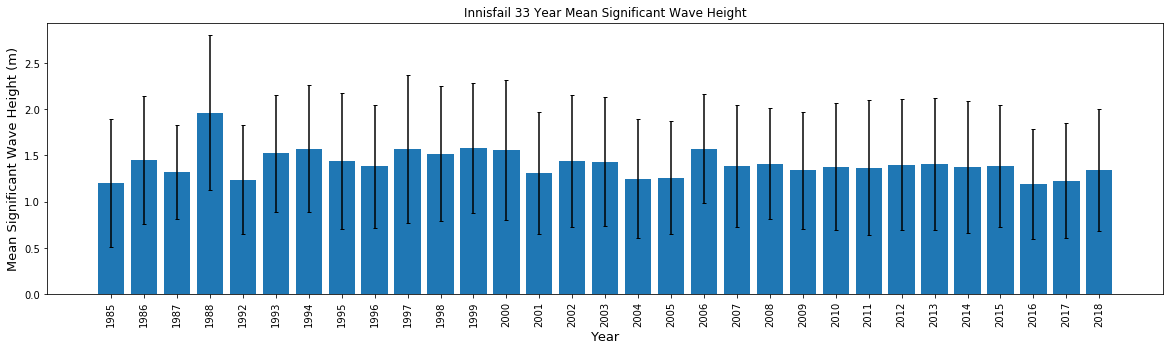

[20.0, 5.0]


In [190]:
index = np.arange(len(label))
plt.bar(index, overall, yerr=stdev, align='center', capsize=2)
plt.xticks(index,label, fontsize=10, rotation=90)
plt.xlabel('Year', fontsize = 13)
plt.ylabel('Mean Significant Wave Height (m)', fontsize=13, rotation=90)
plt.title('Innisfail 33 Year Mean Significant Wave Height')
plt.errorbar
fig_size[0] = 20
fig_size[1] = 5
plt.savefig('Innisfail 33 Year Mean Significant Wave Height')
plt.rcParams["figure.figsize"] = fig_size
plt.show()

fig_size = plt.rcParams["figure.figsize"]
print fig_size

## Increased mean wh in 1988 could be due to instrument failure in August, potentially leading to skewed results, and storm of meanwh: 4.65m on 1988-06-25

## Attempt to do linear regression

In [139]:
from sklearn.linear_model import LinearRegression

In [150]:
X = overall
yearsss = [
1985,
1986,
1987,
1988,
1992,
1993,
1994,
1995,
1996,
1997,
1998,
1999,
2000,
2001,
2002,
2003,
2004,
2005,
2006,
2007,
2008,
2009,
2010,
2011,
2012,
2013,
2014,
2015,
2016,
2017,
2018]

In [157]:
X = overall.nparray.reshape(-1,1)  # values converts it into a numpy array
Y = yearsss.nparray.reshape(-1,1) # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

AttributeError: 'list' object has no attribute 'nparray'

In [ ]:
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
plt.style.use('Solarize_Light2')





r = requests.get('https://datamarket.com/api/v1/list.json?ds=22qx')
jobj = json.loads(r.text[18:-1])
data = jobj[0]['data']
df = pd.DataFrame(data, columns=['time','data']).set_index('time')
train = df.iloc[:-10, :]
test = df.iloc[-10:, :]
pred = test.copy()
df.plot(figsize=(12,3));
plt.title(jobj[0]['title']);

df['z_data'] = (df['data'] - df.data.rolling(window=12).mean()) / df.data.rolling(window=12).std()
df['zp_data'] = df['z_data'] - df['z_data'].shift(12)

def plot_rolling(df):
    fig, ax = plt.subplots(3,figsize=(12, 9))
    ax[0].plot(df.index, df.data, label='raw data')
    ax[0].plot(df.data.rolling(window=12).mean(), label="rolling mean");
    ax[0].plot(df.data.rolling(window=12).std(), label="rolling std (x10)");
    ax[0].legend()

    ax[1].plot(df.index, df.z_data, label="de-trended data")
    ax[1].plot(df.z_data.rolling(window=12).mean(), label="rolling mean");
    ax[1].plot(df.z_data.rolling(window=12).std(), label="rolling std (x10)");
    ax[1].legend()

    ax[2].plot(df.index, df.zp_data, label="12 lag differenced de-trended data")
    ax[2].plot(df.zp_data.rolling(window=12).mean(), label="rolling mean");
    ax[2].plot(df.zp_data.rolling(window=12).std(), label="rolling std (x10)");
    ax[2].legend()

    plt.tight_layout()
    fig.autofmt_xdate()